# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (23)

**26/02/2024**

## Aplicar un caso de uso (*Clustering*)

### Dataset de *Bike-sharing*

Uno de los conjuntos de datos reales e interesantes para ejercicios de _regresión_, _clasificación_ y también ___clustering___ es el **Conjunto de datos para compartir bicicletas** o el __[Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)__ de la _Universidad de Oporto_. Este dataset contiene datos de uso de bicicletas de alquiler de un programa de bicicletas compartidas en _Washington D.C._ durante un período de dos años (_2011_ y _2012_).

Uno de los retos que se plantea para este conjunto de datos es **agrupar los datos de _bike-sharing_** en función de las diferentes **condiciones climáticas** y otros factores, como **días festivos y laborales**, para **`identificar patrones en el uso de bicicletas de alquiler`**. Esto puede ayudar a las empresas de _bike-sharing_ a **comprender mejor el comportamiento de los clientes** y el tipo de viajes realizados con el fin de **optimizar** sus servicios. Además, se puede analizar los **patrones de movilidad en la ciudad** de cara a la **gestión eficiente** de los servicios municipales.

Este dataset incluye 17 variables para los datos horarios y ***16 variables*** para el conjunto de datos agregados a nivel ***diario***:

- **instant**:  Índice de registro  
- **dteday**:  Fecha y hora de la observación
- **season**:  Estación del año (1:invierno, 2:primavera, 3:verano, 4:otoño)
- **yr**:  Año (0:2011, 1:2012)
- **mnth**:  Mes (1 a 12)
- **holiday**:  Si el día es festivo o no
- **weekday**:  Día de la semana (0 a 6)
- **workingday**:  Si el día es laborable o no (1: sí, 0: no)
- **weathersit**:  Situación meteorológica (1: despejado, 2: nublado, 3: lluvia ligera/nieve, 4: lluvia intensa/nieve)
- **temp**:  Temperatura (normalizada en Celsius)
- **atemp**:  Temperatura marcada por la sensación térmica (normalizada en Celsius)
- **hum**:  Humedad normalizada
- **windspeed**:  Velocidad del viento normalizada
- **casual**:  Número de usuarios casuales (no registrados)
- **registrado**:  Número de usuarios registrados
- **cnt**:  Recuento total de bicicletas alquiladas (suma de usuarios casuales y registrados).



In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 18, 8 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

Leemos los datos mediante el archivo adjunto.

In [3]:
# Lectura de datos
df_bike = pd.read_csv('bike-sharing-daily.csv')
df_bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Vamos a quitar los datos que no son de intrés para este estudio, como el número de registros o la fecha que en sí no nos dice nada. Nos quedamos con el número total de bicicletas sin desglosarlo. 

In [4]:
col_drop = ['instant', 'dteday', 'yr', 'casual', 'registered']
df_bike2 = df_bike.drop(columns=col_drop)
df_bike2

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [5]:
# La información útil sobre los datos guardados en formato DataFrame
df_bike2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


Podemos ver que **no hay valores nulos** y toda la información es **numérica**.

In [6]:
# Echamos un vistazo a las características de cada variable
df_bike2.describe()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


Es evidente que la escala de los datos es muy variada y por ello más adelante procederemos a estandarizar los datos.  

#### Ánalisis exploratorio

Vamos a realizar una serie de gráficas con el objetivo de **conocer mejor los datos y la información** que contienen estas muestras.

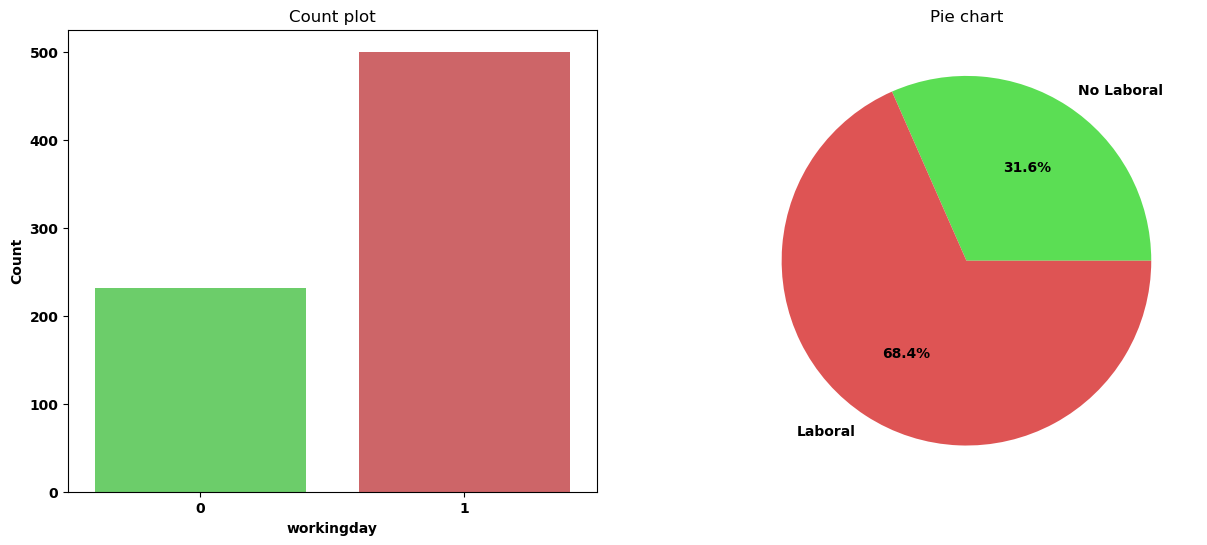

In [7]:
fig, axes = plt.subplots(1,2, figsize=(15, 6))

# Count plot (primera gráfica)
sns.countplot(data=df_bike2, x='workingday', label=df_bike2['workingday'].value_counts().sort_values().index, palette=['#5cde59',"#de5458"], ax=axes[0])
axes[0].set_title("Count plot")
axes[0].set_ylabel("Count")

# pie chart (segunda gráfica)
plt.pie(df_bike2['workingday'].value_counts().sort_values(), autopct='%.1f%%', labels=['No Laboral', 'Laboral'], colors=['#5bde54',"#de5454"])
axes[1].set_title("Pie chart")

plt.show()

La variable más determinante en este análisis sería el **número de los usuarios/viajes** que se han registrado cada día. Realizamos un análisis estadístico para ver la **distribución de volumetría de bicicletas alquiladas** en función de otras variables del dataset.   

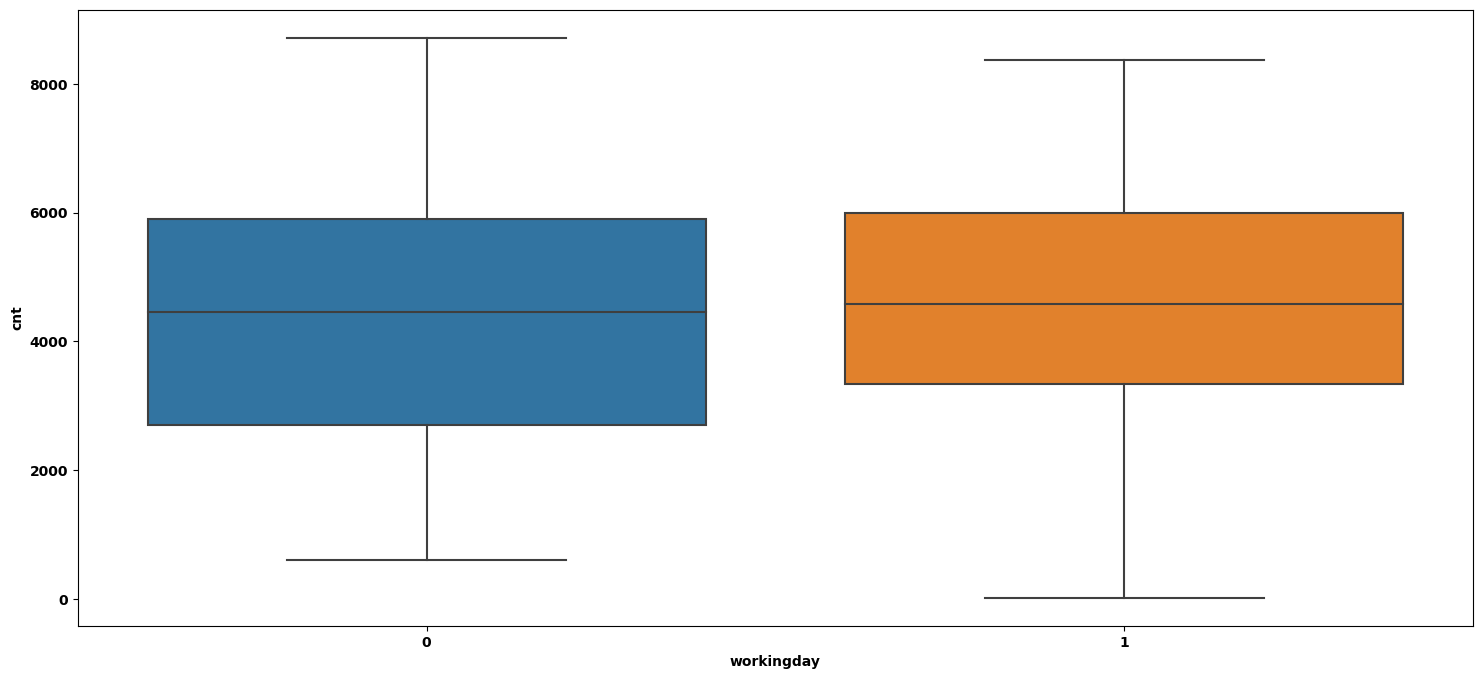

In [8]:
# Análisis de volumetría en función de días laborables
sns.boxplot(data=df_bike2, x='workingday', y='cnt')
plt.show()

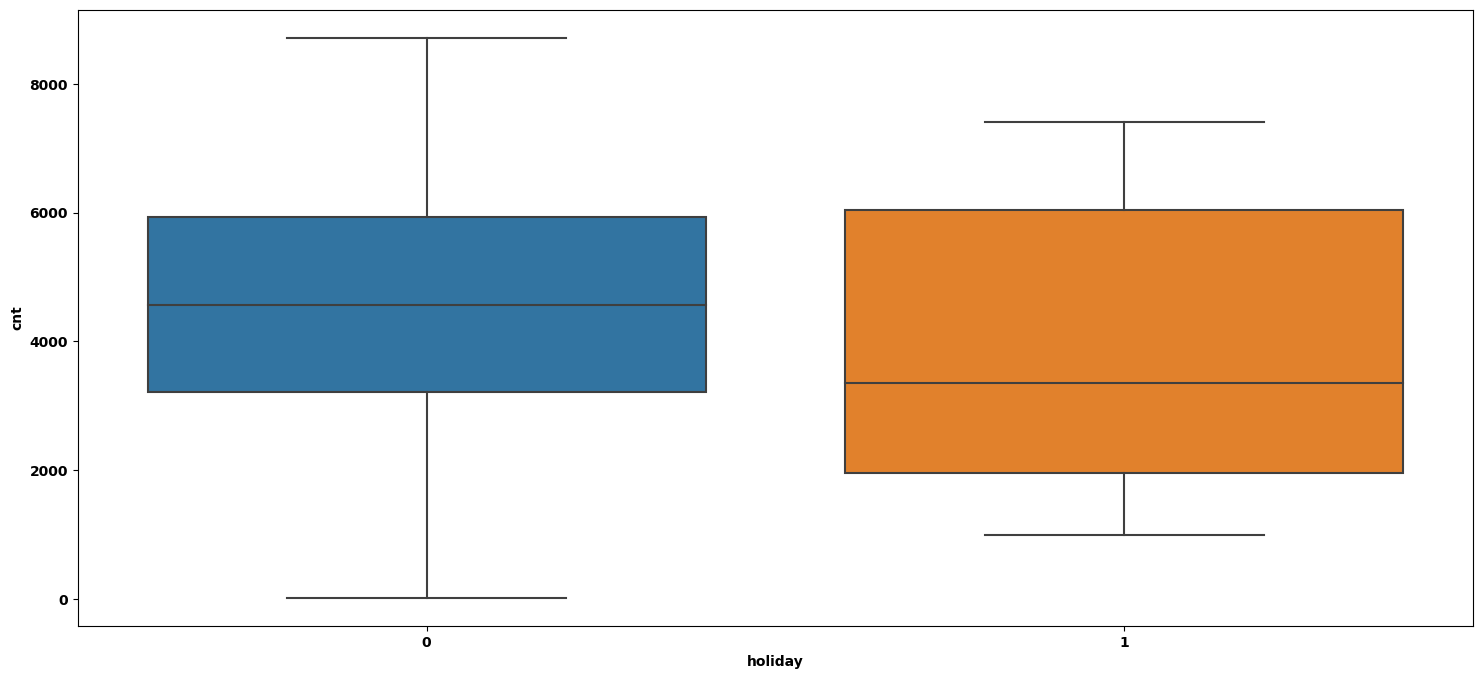

In [9]:
# Análisis de volumetría en función de la festividad
sns.boxplot(data=df_bike2, x='holiday', y='cnt')
plt.show()

Debemos tener en cuenta que esxisten dían no laborales que no corresponden a las vacaciones o festividades concretas!

In [10]:
df_bike2.groupby(['workingday', 'holiday'])['cnt'].count()

workingday  holiday
0           0          210
            1           21
1           0          500
Name: cnt, dtype: int64

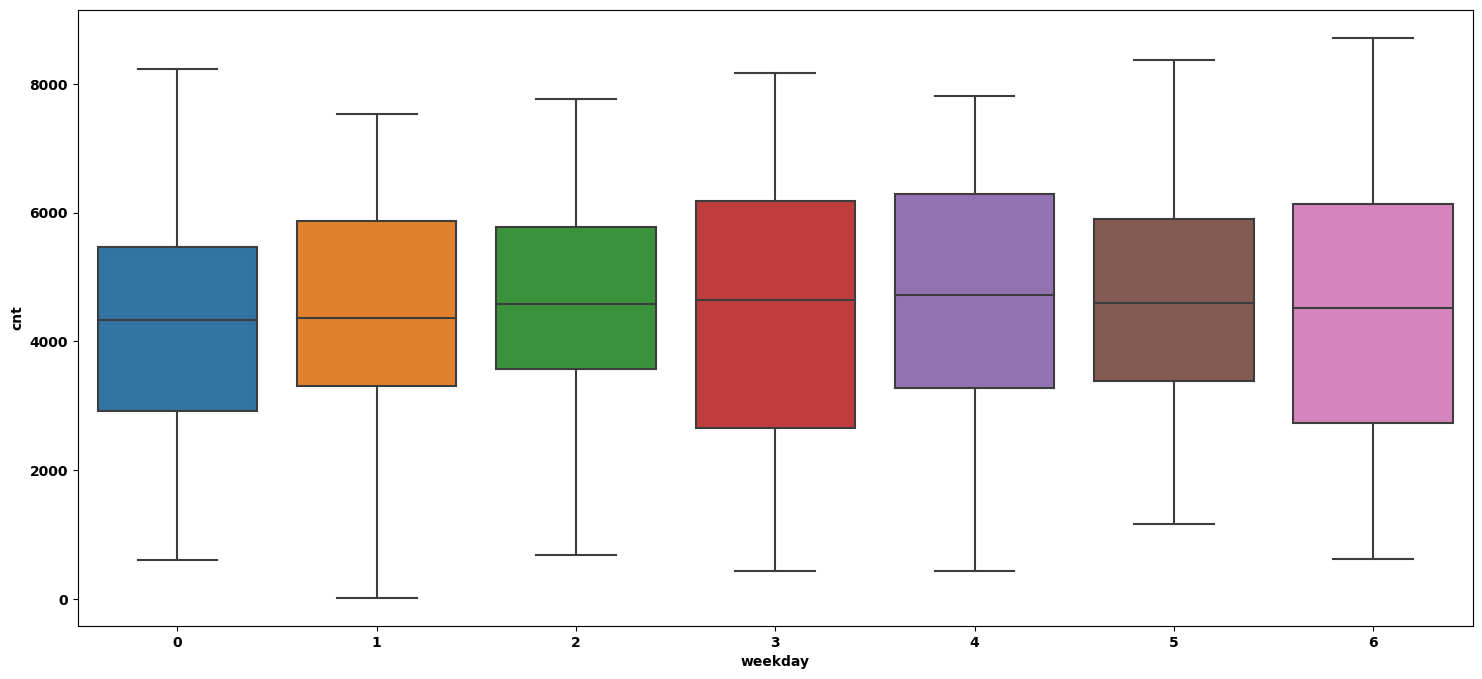

In [11]:
# Análisis de volumetría en función de días la semana
sns.boxplot(data=df_bike2, x='weekday', y='cnt')
plt.show()

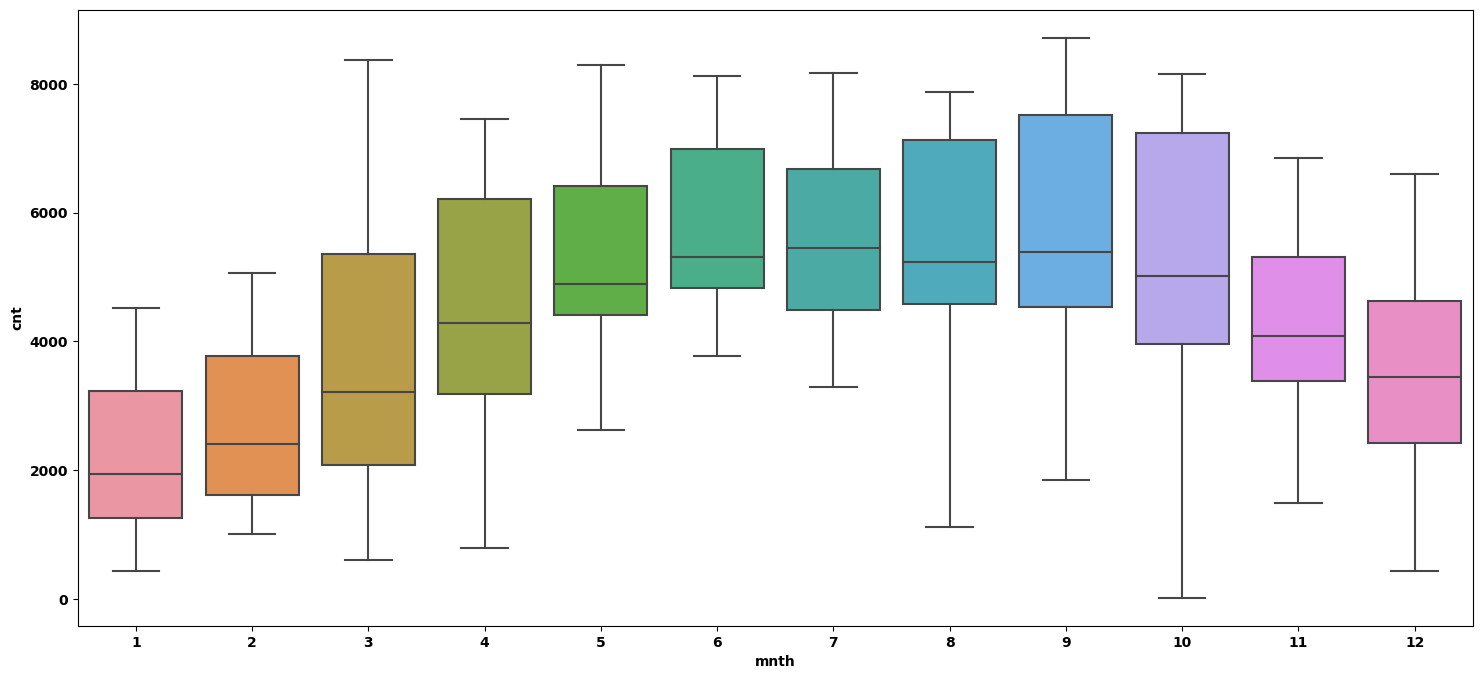

In [12]:
# Análisis de volumetría por mes
sns.boxplot(data=df_bike2, x='mnth', y='cnt')
plt.show()

Este gráfico confirma que nuestro dataset tiene una **estacionalidad considerable**. Este hecho seguramente influiría en la extracción de grupos de viajes y analizar los **patrones de movilidad** correspondiente al servicio de _bike-sharing_. 

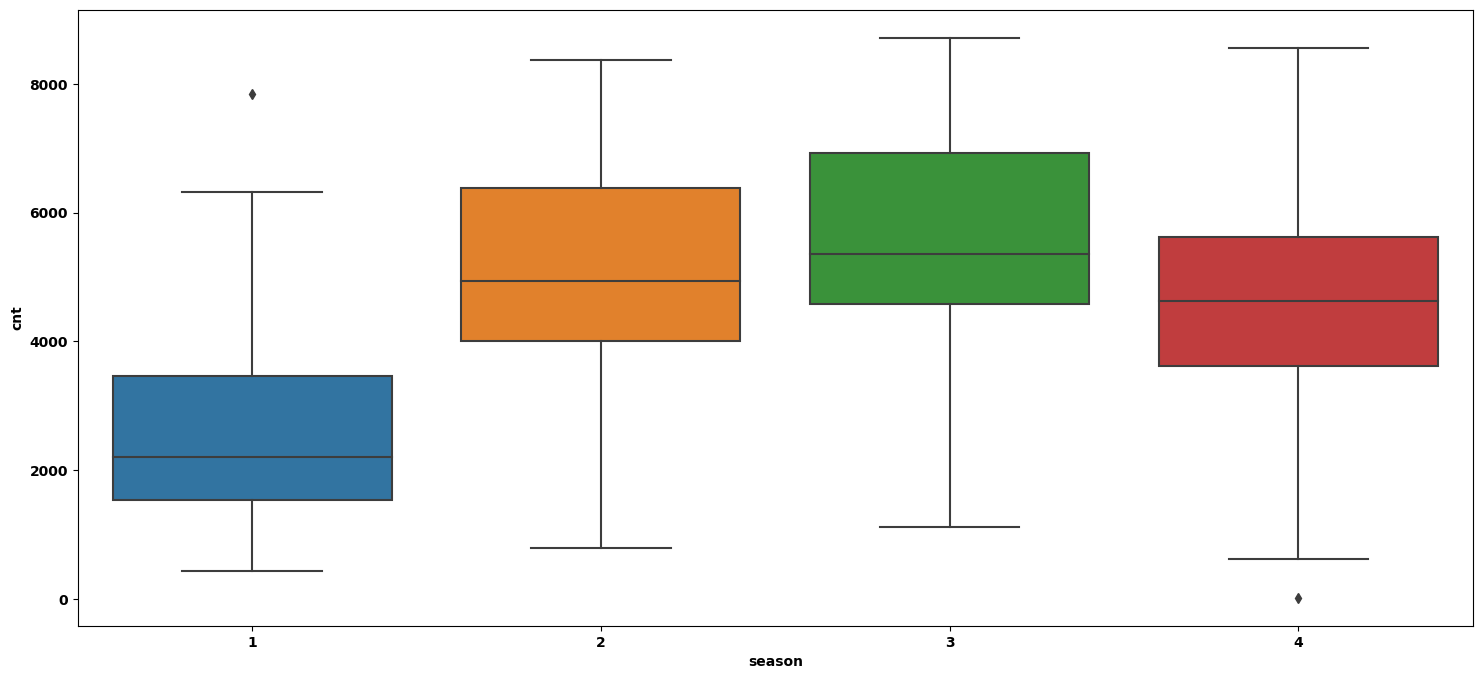

In [13]:
# Análisis de volumetría en función de la estación del año
sns.boxplot(data=df_bike2, x='season', y='cnt')
plt.show()

Es de esperar que la estacionalidad mensual afecte en su forma agregada a la **evolución trimestral** de volumetría de _bike-sharing_ según la **estación del año**.

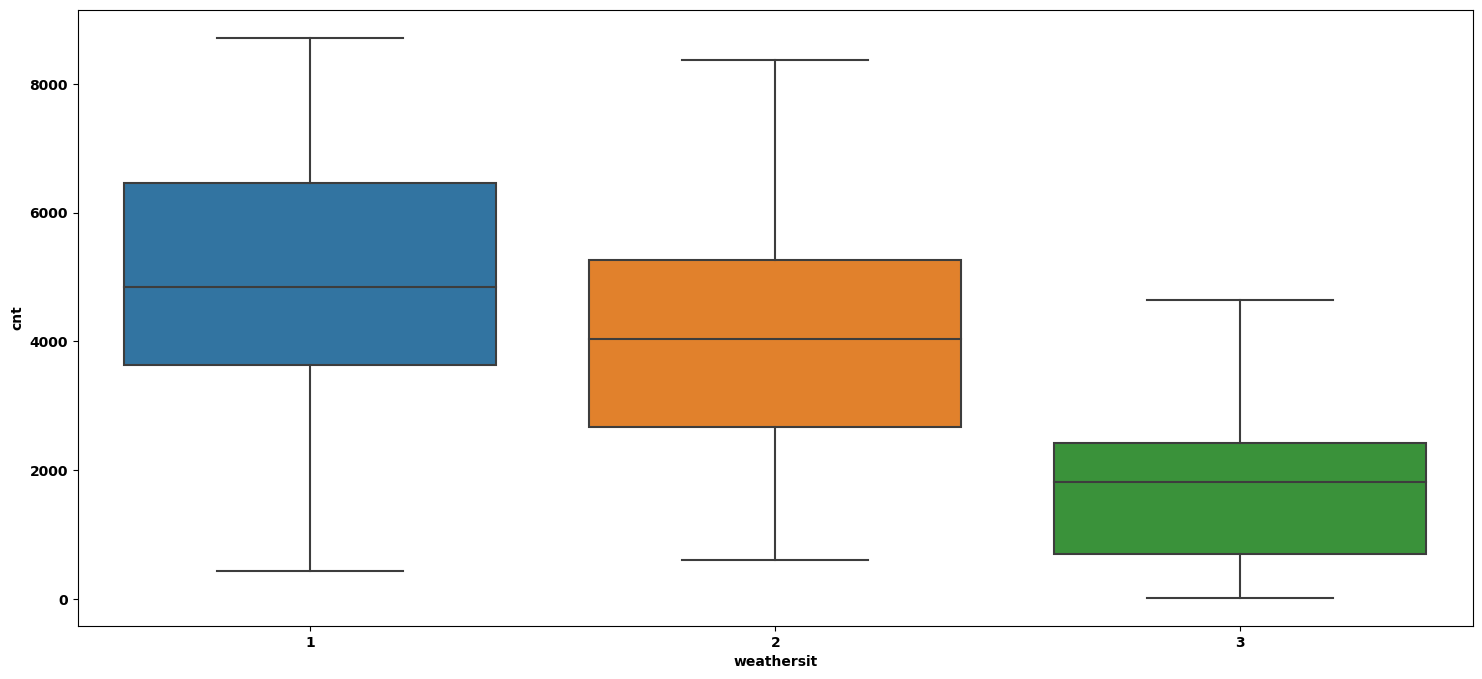

In [14]:
# Análisis de volumetría en función de la situación climática
sns.boxplot(data=df_bike2, x='weathersit', y='cnt')
plt.show()

Se observa una **distinción lógica** entre las volumetrías registradas para cada situación climática, indicando la importancia de las **condiciones meteorológicas** sobre el uso de servicio de _bike-sharing_. 

Examinamos las realciones que hay entre las variables de tiempo para analizar mejor esta correlación.

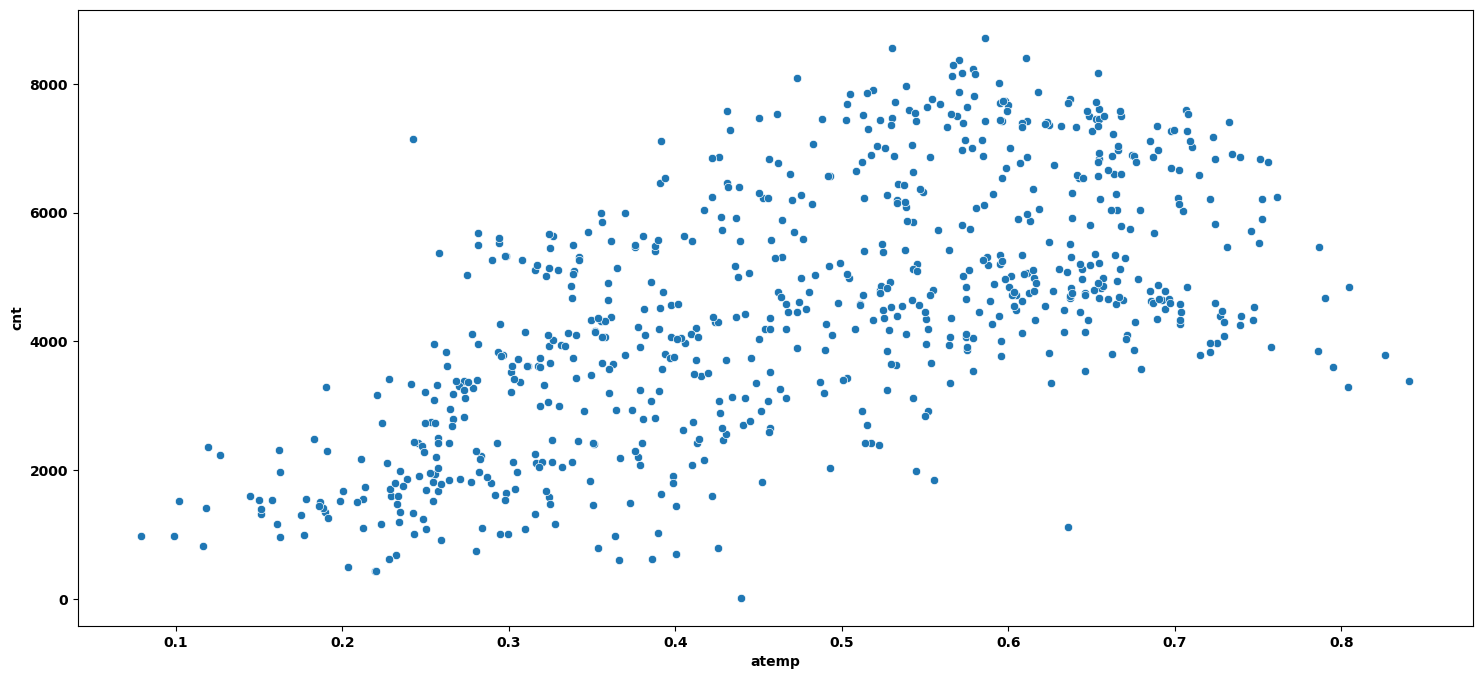

In [15]:
# Dibujar la relación entre la temperatura (la sensación térmica) y la volumetría
sns.scatterplot(data=df_bike2, x='atemp', y='cnt')
plt.show()

Se puede observar que efectivamente los días con **más bicicletas alquiladas** corresponden a los días con **las temperaturas moderadas**. 

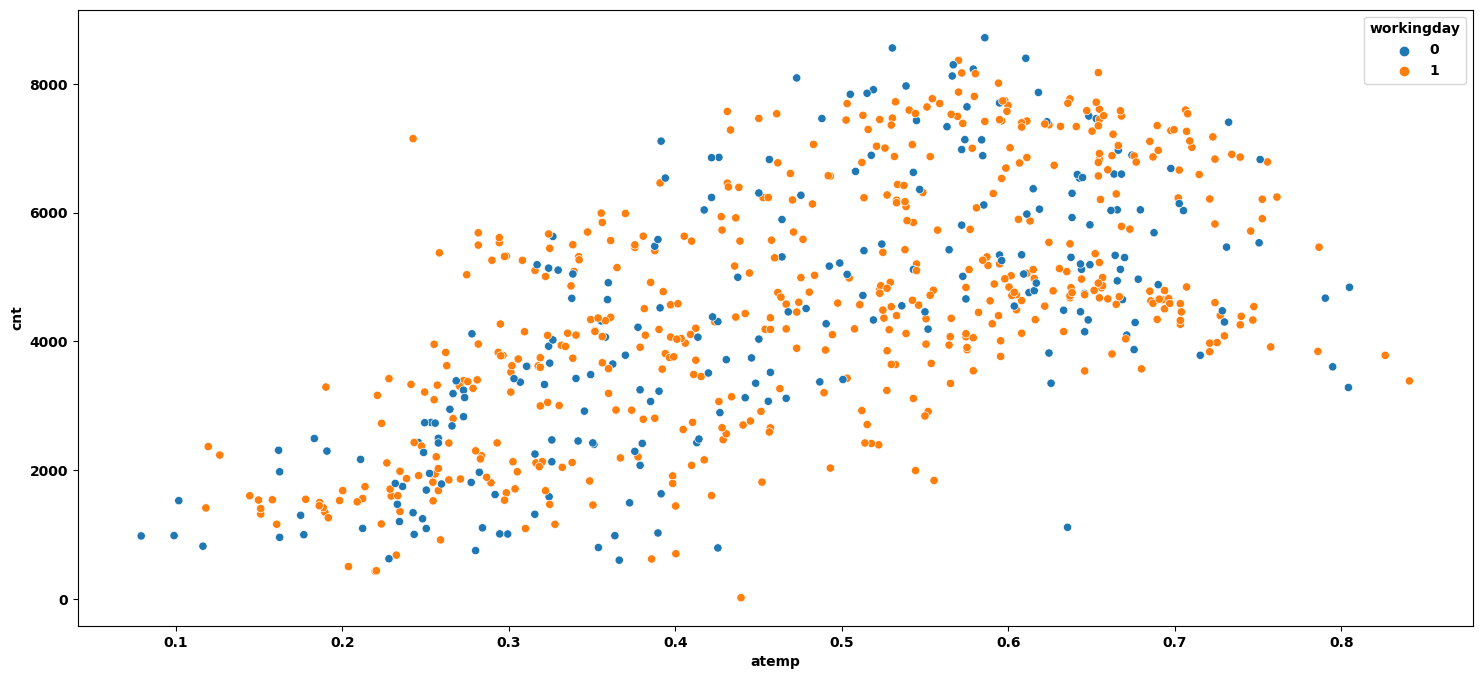

In [16]:
sns.scatterplot(data=df_bike2, x='atemp', y='cnt', hue='workingday')
plt.show()

Si pintamos según los días laborables cada punto en la gráfica antreior entre temperatura y los volúmenes de viajes o bicicletas alquiladas, se ve que **no hay una realción** que distinga la evolución de los datos en función de esta variable.

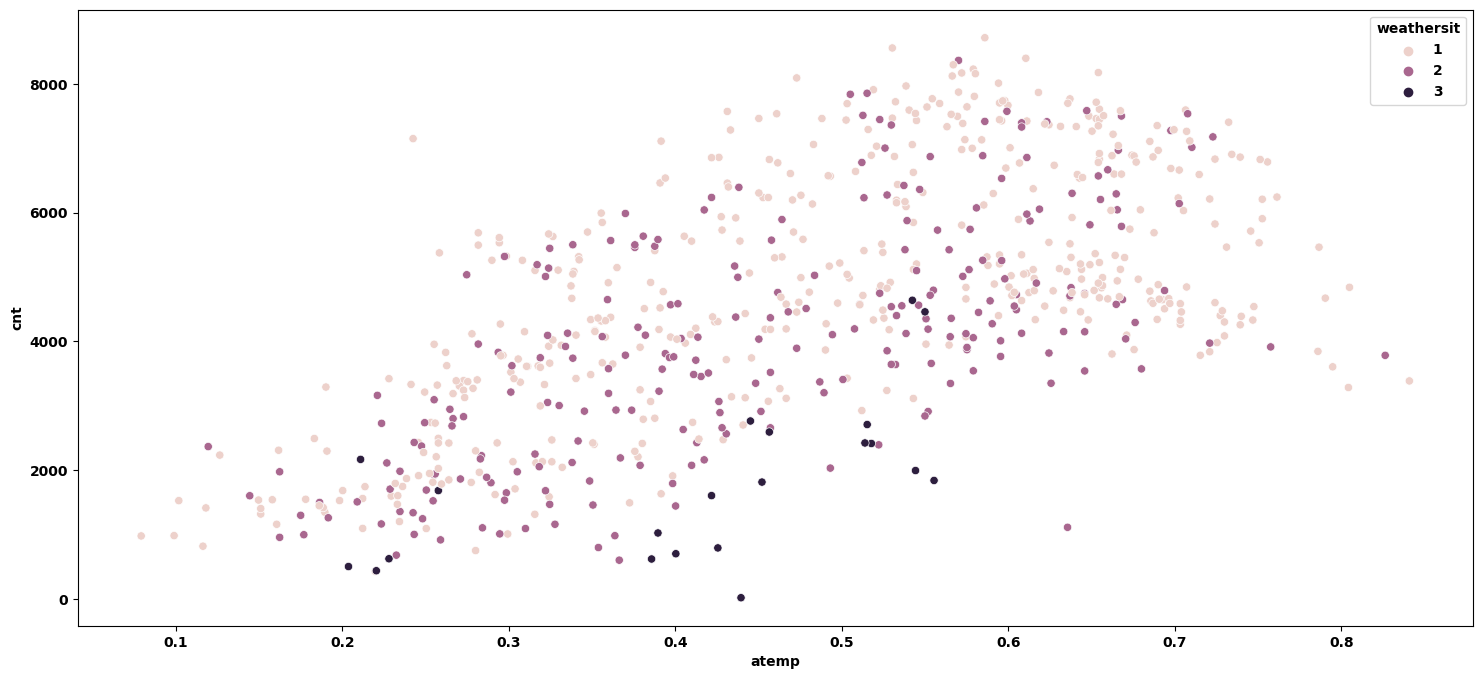

In [17]:
sns.scatterplot(data=df_bike2, x='atemp', y='cnt', hue='weathersit')
plt.show()

Pintando los datos de acuerdo con la calidad de tiempo que hace en la ciudad, muestra que los **días con menos usos** corresponden a **situaciones meteorológicas adversas**. Podemos observar este mismo comporertamiento si visualizamos las **humedades** registradas.

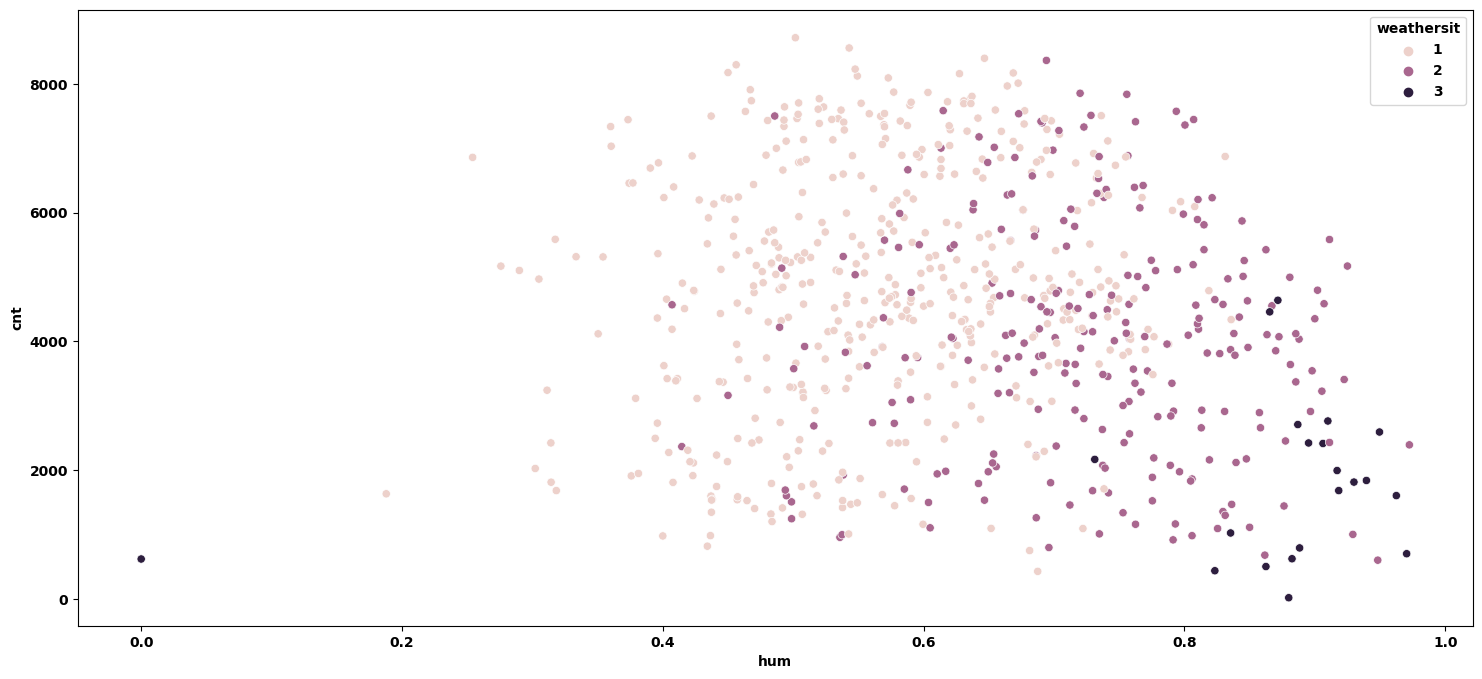

In [18]:
sns.scatterplot(data=df_bike2, x='hum', y='cnt', hue='weathersit')
plt.show()

Viendo las gráficas anteriores que visualizan las diferentes variables meteorológicas presentes en este conjunto de datos, podemos quedarnos con la variable categórica de `weathersit` (_Weather situation_) que al parecer resume y representa la noción de cuando hace **"buen tiempo"** y cuando no.

Revisamos otra vez la ditribución de volumetría de bicicletas alquiladas en función del día de la semana (_weekday_), **por si vemos que no aporta una información discriminatoria** a la hora de agrupar los patrones de uso de _bike-sharing_.

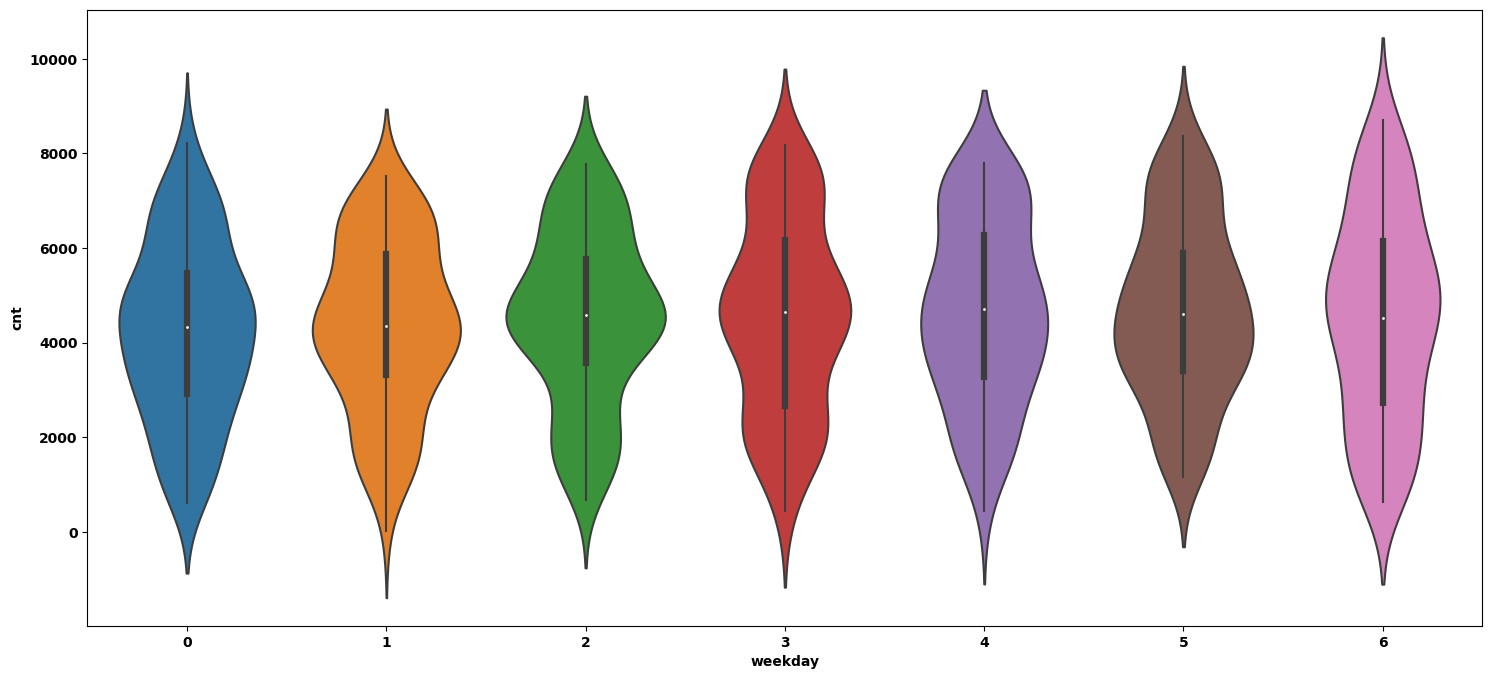

In [19]:
sns.violinplot(data=df_bike2, x='weekday', y='cnt')
plt.show()

Al parecer podemos **prescindir de la variable `weekday`**, porque la **forma y las características** que tiene la distribución de valores para cada día son bastante **similares**.

Por otra parte, pasa algo parecido con la variable `workingday` que no tiene una distribución diferente en sus dos categorías y podemos **ver reflejado el efecto de los días laborales** quizá mejor en la variable **`holiday`**. 

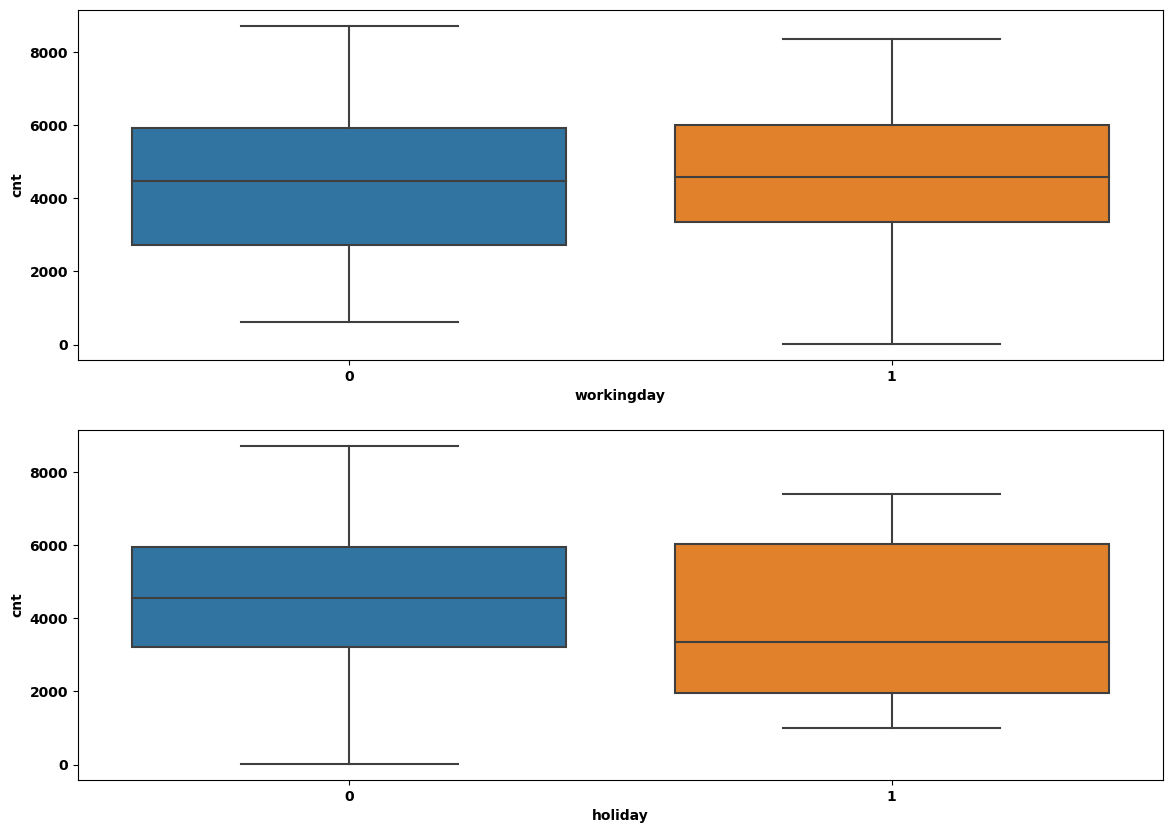

In [20]:
fig , axes = plt.subplots(2, 1, figsize=(14,10))

sns.boxplot(data=df_bike2, x='workingday', y='cnt', ax=axes[0])
sns.boxplot(data=df_bike2, x='holiday', y='cnt', ax=axes[1])
plt.show()

Ahora hacemos otro filtrado para **reducir la dimensionalidad** del conjunto de datos y quedarnos con la parte **representativa** e interesante de los datos.

In [21]:
df_bike3 = df_bike2.drop(columns=['weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed'])
df_bike3

,season,mnth,holiday,weathersit,cnt
0,1,1,0,2,985
1,1,1,0,2,801
2,1,1,0,1,1349
3,1,1,0,1,1562
4,1,1,0,1,1600
...,...,...,...,...,...
726,1,12,0,2,2114
727,1,12,0,2,3095
728,1,12,0,2,1341
729,1,12,0,1,1796


Analizamos en su conjunto las **relaciones exsitentes** entre las variables del dataset filtrado, considerando la importancia de las **condiciones meteorológicas**.

/Users/mireyasanchez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


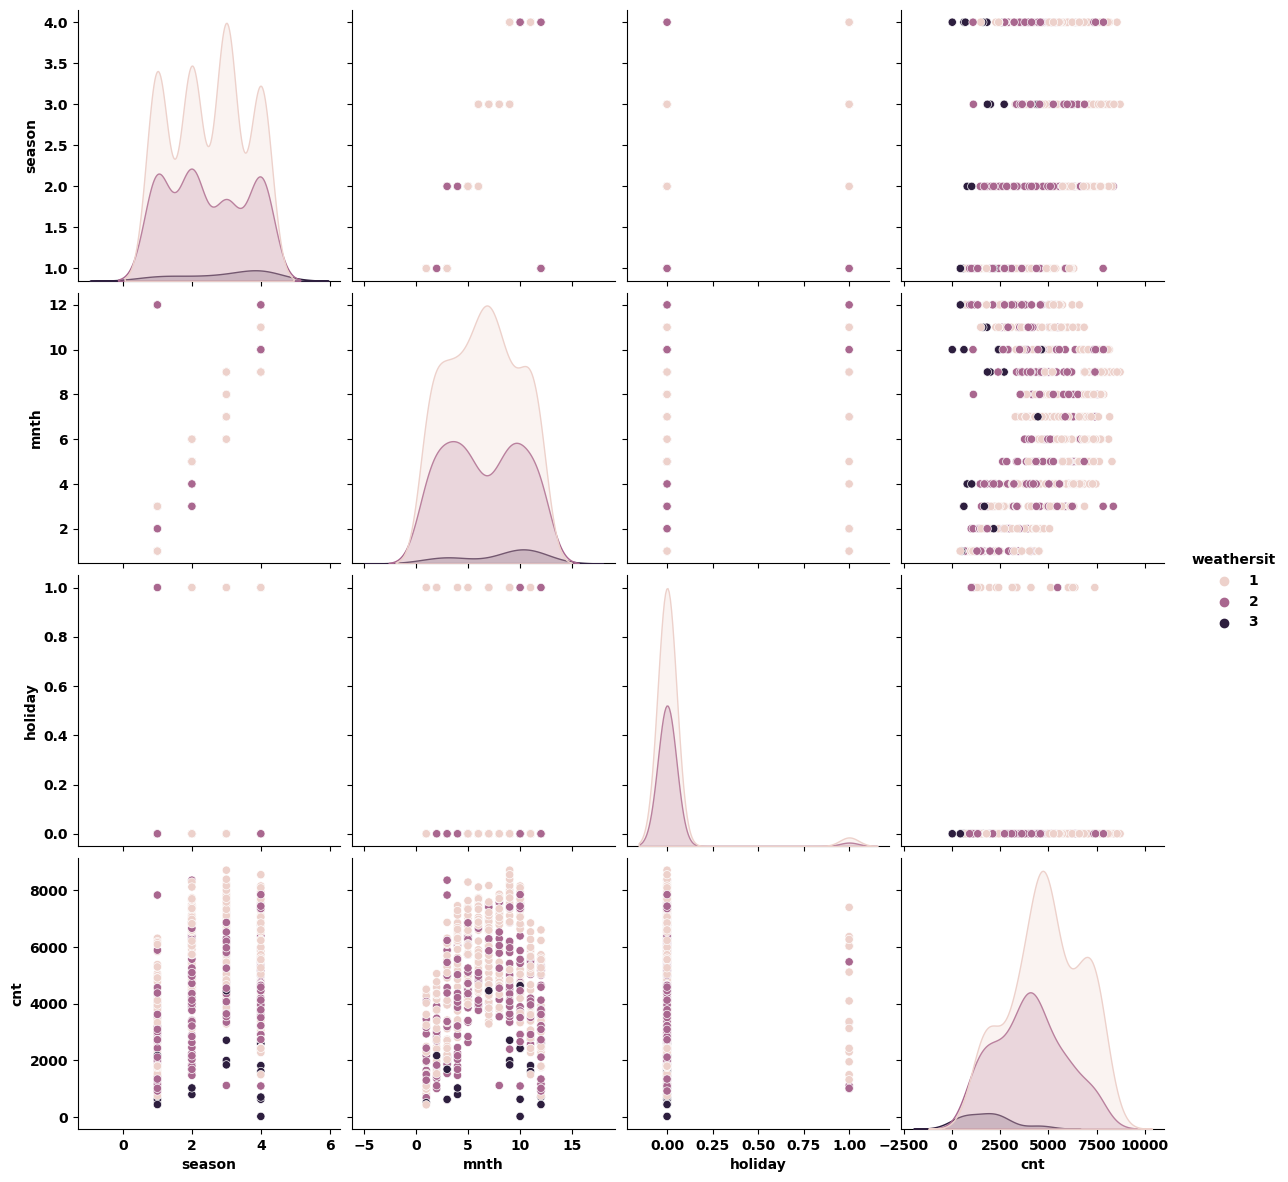

In [22]:
sns.pairplot(df_bike3, hue='weathersit', height=3)
plt.show()

Esta vista sobre el conjunto de las variables **confirma el efecto discriminador de la variable `weathersit`**, ya que extrae **distribuciones desemejantes** en función de sus valores para cada variable. Hacemos zoom por ejemplo para visualizar mejor este efecto en la relación entre la volumetría de las bicicletas alquiladas diariamente y los meses del año considerando la situación del tiempo. 

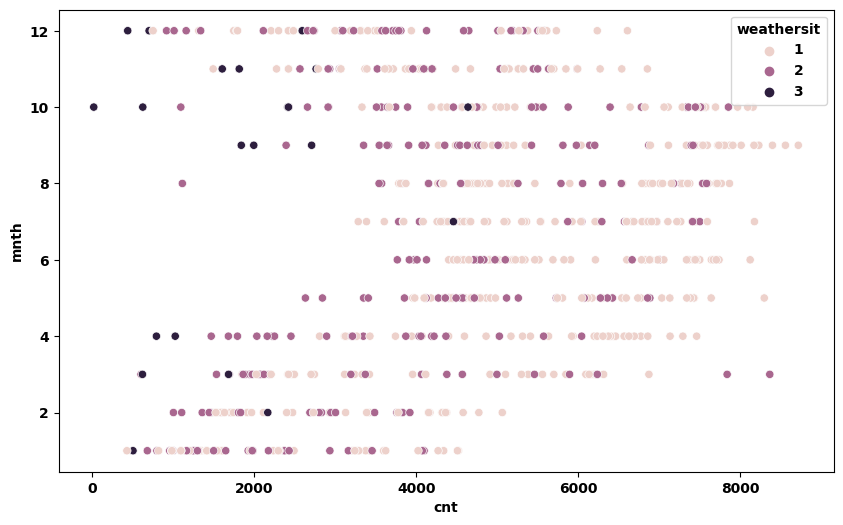

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_bike3, x='cnt', y='mnth', hue='weathersit')
plt.show()

---

### **`Ejercicio 23.1`**

Para poder realizar un ejercicio de **aprendizaje no-supervisado** tipo **clustering**, necesitamos hacernos primero una idea sobre el **número de los clusters o los grupos** que están presentes en los datos. 

**`23.1.1`** En primer lugar, **estandariza** los datos del dataset filtrado (_df_bike3_) llevando los valores de cada variable a una escala **entre 0 y 1**.

**`23.1.2`** Aplica un análisis de componentes principales usando el método **`PCA`** de la librería _sklearn_ para llevar los datos a un **espacio bidimensional**. Calcula **el porcentaje total de varianza** que incluyen los dos componentes principales juntos, posteriormente:

- Visualiza en una gráfica los datos del vector con los valores proyeccionados a los dos componentes principales.
- Visualiza la misma gráfica, ésta vez pintando los puntos de datos según la condición meteorológica del día (variable `weathersit`).  

**`23.1.3`** Utiliza la visualización obtenida de los datos en el espacio bidimensional para hacer una **estimación del número óptimo de los clusters (_k_)** o los grupos presentes en el dataset. 

In [24]:
df_bike3

,season,mnth,holiday,weathersit,cnt
0,1,1,0,2,985
1,1,1,0,2,801
2,1,1,0,1,1349
3,1,1,0,1,1562
4,1,1,0,1,1600
...,...,...,...,...,...
726,1,12,0,2,2114
727,1,12,0,2,3095
728,1,12,0,2,1341
729,1,12,0,1,1796


In [25]:
# Ejercicio 23.1.1:
from sklearn.preprocessing import MinMaxScaler

escalado_23_1 = MinMaxScaler().fit(df_bike3)
dataset_normal = escalado_23_1.transform(df_bike3)
X_normal = pd.DataFrame(dataset_normal, columns=df_bike3.columns)
X_normal.describe()

,season,mnth,holiday,weathersit,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.498860,0.501803,0.028728,0.197674,0.515687
std,0.370269,0.313810,0.167155,0.272447,0.222873
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.272727,0.000000,0.000000,0.360101
50%,0.666667,0.545455,0.000000,0.000000,0.520709
75%,0.666667,0.818182,0.000000,0.500000,0.682697
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df_bikes_normal = pd.DataFrame(dataset_normal, columns=df_bike3.columns)

In [27]:
# Ejercicio 23.1.2:
from sklearn.decomposition import PCA

pca_23_1_2 = PCA(n_components=2)
pca_23_1_2.fit(df_bikes_normal)
pcv_23_1_2 = pca_23_1_2.transform(df_bikes_normal)

In [28]:
pca_23_1_2.explained_variance_ratio_.sum() * 100

79.36129806286183

In [29]:
df_pca_23_1_2 = pd.DataFrame(data=pcv_23_1_2, columns=['pcv1', 'pcv2'])

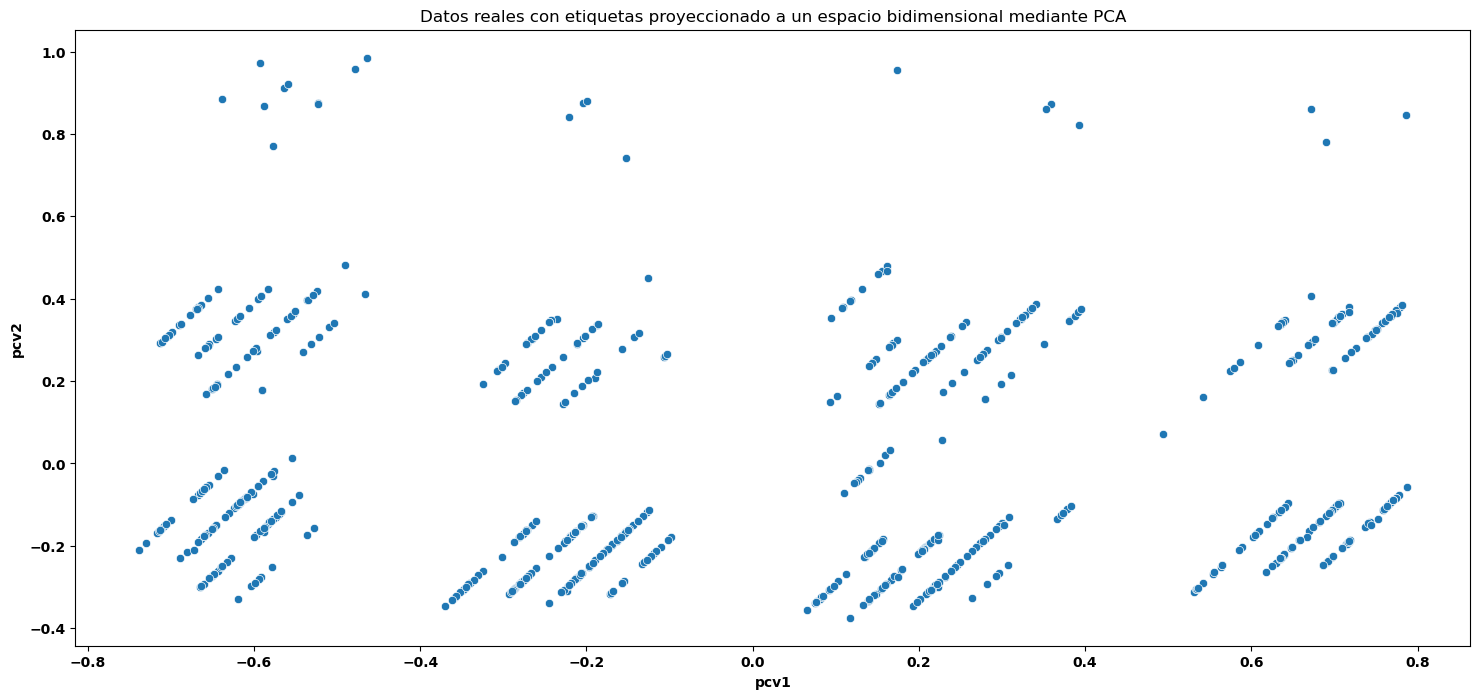

In [30]:
sns.scatterplot(x=df_pca_23_1_2['pcv1'], y=df_pca_23_1_2['pcv2'])
plt.title("Datos reales con etiquetas proyeccionado a un espacio bidimensional mediante PCA")
plt.show()

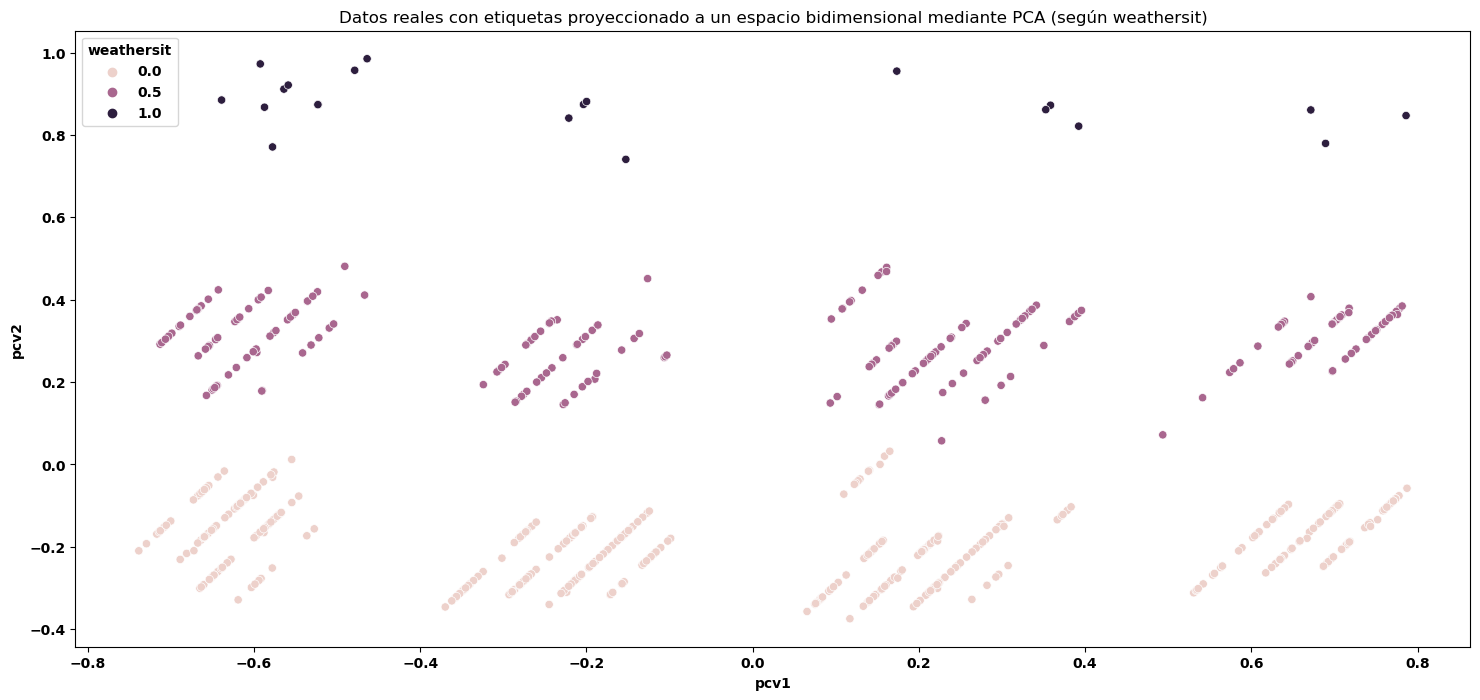

In [31]:
sns.scatterplot(x=df_pca_23_1_2['pcv1'], y=df_pca_23_1_2['pcv2'], hue=df_bikes_normal['weathersit'])
plt.title("Datos reales con etiquetas proyeccionado a un espacio bidimensional mediante PCA (según weathersit)")
plt.show()

#### Análisis 23.1.3:
Podemos concluir que hay 12 grupos diferentes.

### **`Ejercicio 23.2`**

**`23.2.1`** Calcula las diferentes métricas de análisis de calidad de clustering, usando el **vector con los datos proyeccionados** a los dos componentes principales, y compara si cada estimación coincide con el número óptimo de clusters inferido en el paso anterior (_23.1.3_):

 - WSS (Elbow method)
 - Silhouette score
 - Davies-Bouldin index
 - **Calinski and Harabasz score**
 - **BIC score** (implementación adhoc de las sesiones anteriores)
 - BIC score of GMM
 - `random_state=100`

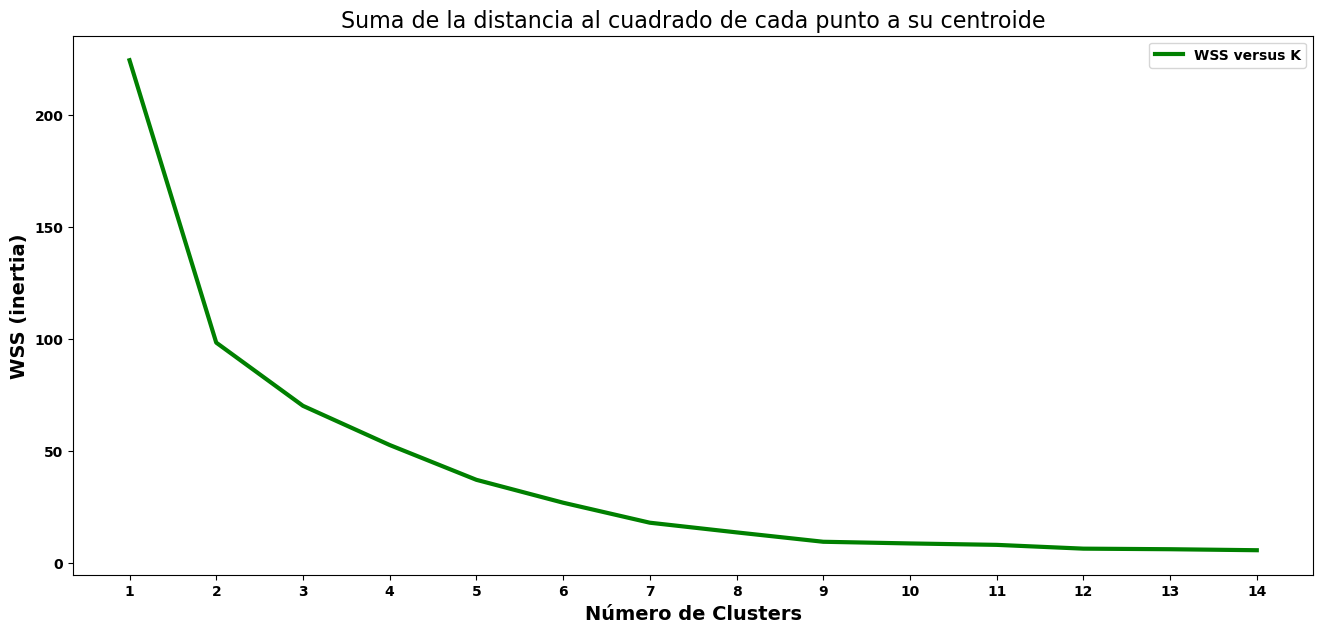

In [32]:
# Ejercicio 23.2.1:
from sklearn.cluster import KMeans

distor_clust_23_2 = []
for k in range(1, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(pcv_23_1_2)
    distor_clust_23_2.append(modelo_km.inertia_)

plt.figure(figsize=(16, 7))
sns.lineplot(x=range(1,15), y=distor_clust_23_2, color='green', label='WSS versus K', linewidth=3)
plt.xticks(range(1,15))
plt.title("Suma de la distancia al cuadrado de cada punto a su centroide", fontsize=16)
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("WSS (inertia)", fontsize=14)
plt.show()

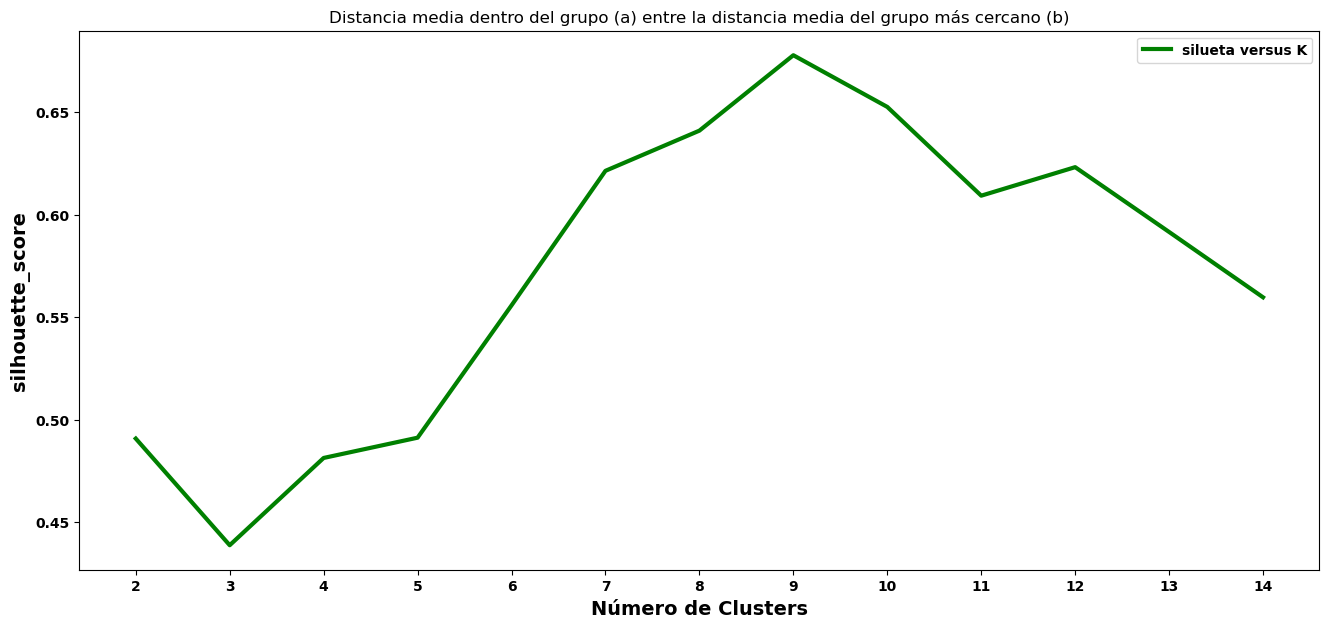

In [33]:
from sklearn.metrics import silhouette_score

sil_clust_23_2 = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(pcv_23_1_2)
    y_modelo_km = modelo_km.predict(pcv_23_1_2)
    sil_clust_23_2.append(silhouette_score(pcv_23_1_2, y_modelo_km))

plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=sil_clust_23_2, color='green', label='silueta versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Distancia media dentro del grupo (a) entre la distancia media del grupo más cercano (b)")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("silhouette_score", fontsize=14)
plt.show()

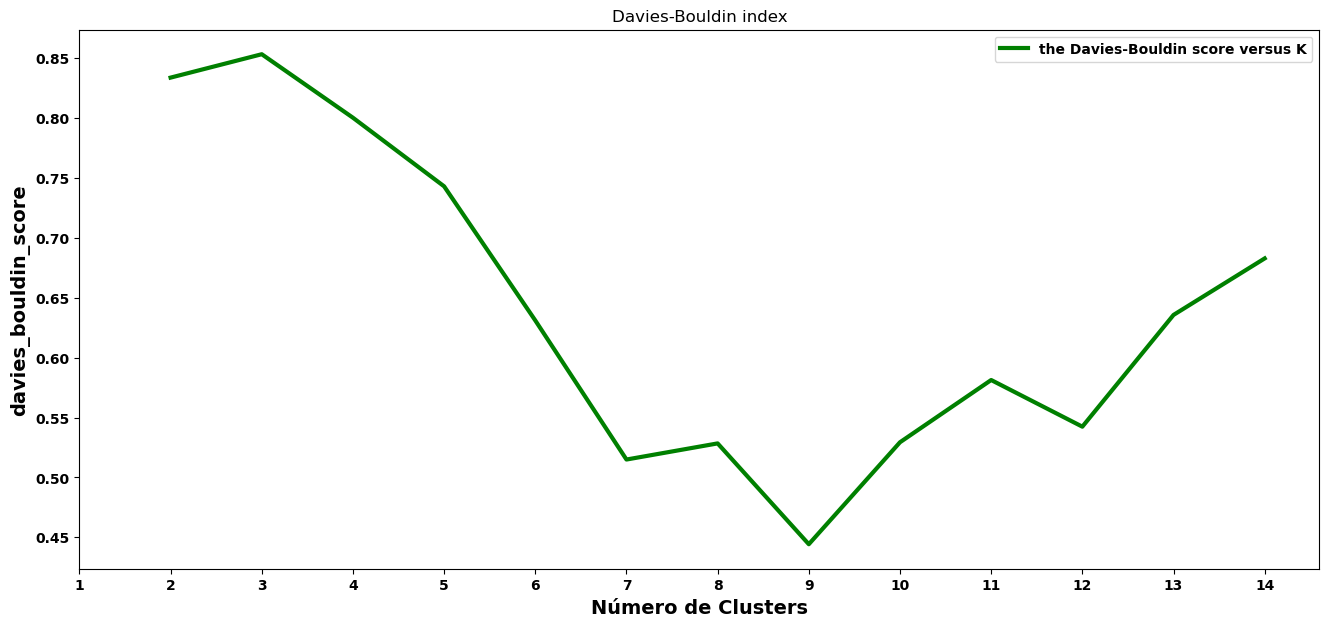

In [34]:
from sklearn.metrics import davies_bouldin_score

dav_clust_23_2 = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(pcv_23_1_2)
    y_modelo_km = modelo_km.predict(pcv_23_1_2)
    dav_clust_23_2.append(davies_bouldin_score(pcv_23_1_2, y_modelo_km))

plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=dav_clust_23_2, color='green', label='the Davies-Bouldin score versus K', linewidth=3)
plt.xticks(range(1,15))
plt.title("Davies-Bouldin index")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("davies_bouldin_score", fontsize=14)
plt.show()


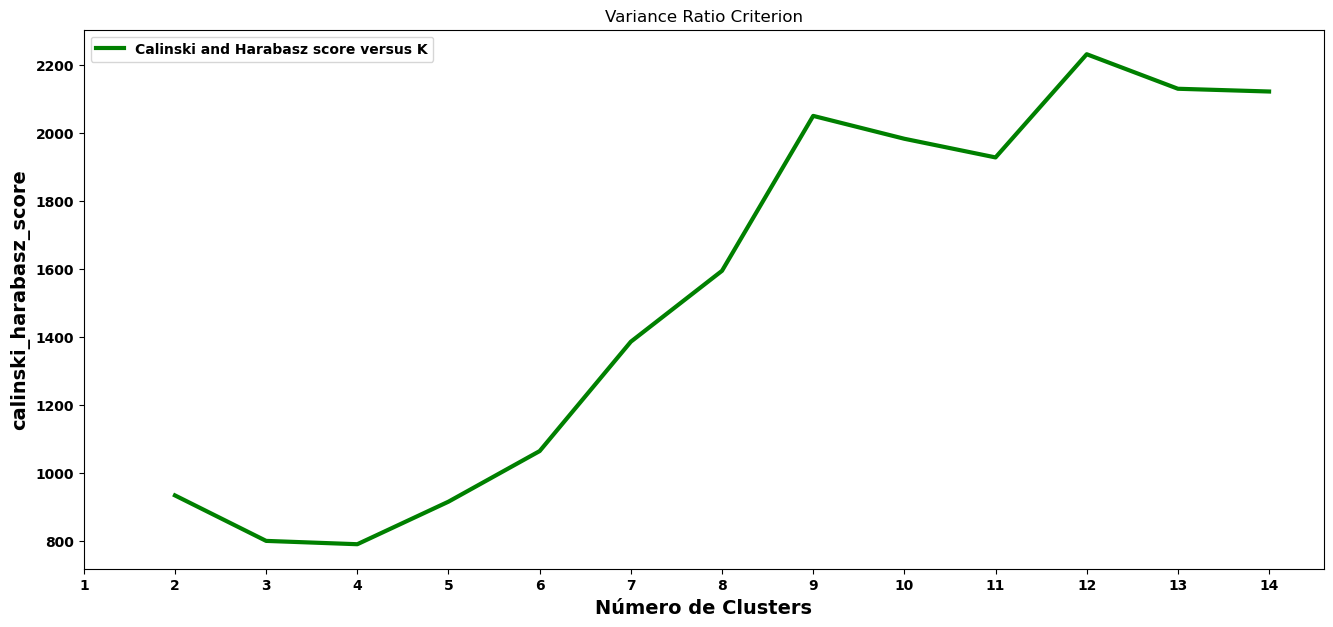

In [35]:
from sklearn.metrics import calinski_harabasz_score

calinsk_clust_23_2 = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(pcv_23_1_2)
    y_modelo_km = modelo_km.predict(pcv_23_1_2)
    calinsk_clust_23_2.append(calinski_harabasz_score(pcv_23_1_2, y_modelo_km))

plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=calinsk_clust_23_2, color='green', label='Calinski and Harabasz score versus K', linewidth=3)
plt.xticks(range(1,15))
plt.title("Variance Ratio Criterion")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("calinski_harabasz_score", fontsize=14)
plt.show()


In [36]:
import math
def bic_score(X, labels):
  """
  BIC score for the goodness of fit of clusters.
  """
    
  n_points = len(labels)
  n_clusters = len(set(labels))
  n_dimensions = X.shape[1]

  n_parameters = (n_clusters - 1) + (n_dimensions * n_clusters) + 1

  loglikelihood = 0
  for label_name in set(labels):
    X_cluster = X[labels == label_name]
    n_points_cluster = len(X_cluster)
    centroid = np.mean(X_cluster, axis=0)
    variance = np.sum((X_cluster - centroid) ** 2) / (len(X_cluster) - 1)
    loglikelihood += \
      n_points_cluster * np.log(n_points_cluster) \
      - n_points_cluster * np.log(n_points) \
      - n_points_cluster * n_dimensions / 2 * np.log(2 * math.pi * variance) \
      - (n_points_cluster - 1) / 2
    
  bic = loglikelihood - (n_parameters / 2) * np.log(n_points)
        
  return -bic

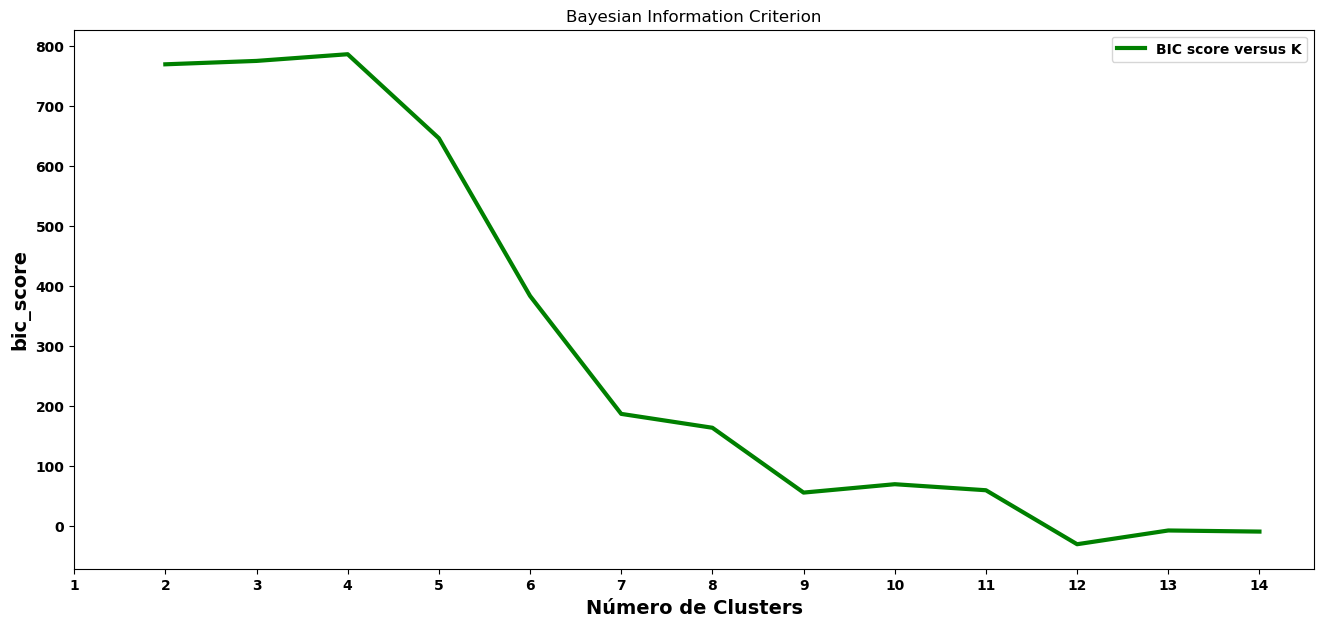

In [37]:

bic_clust_23_2 = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(pcv_23_1_2)
    y_modelo_km = modelo_km.predict(pcv_23_1_2)
    bic_clust_23_2.append(bic_score(pcv_23_1_2, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=bic_clust_23_2, color='green', label='BIC score versus K', linewidth=3)
plt.xticks(range(1,15))
plt.title("Bayesian Information Criterion")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("bic_score", fontsize=14)
plt.show()

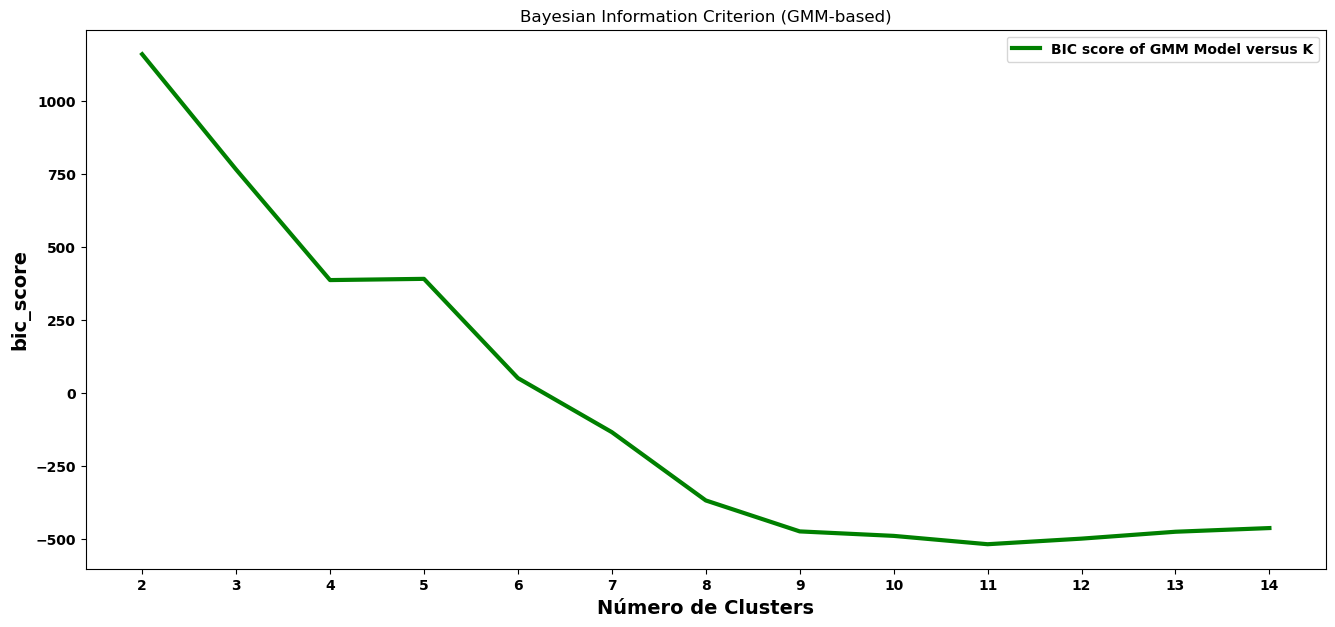

In [38]:
from sklearn.mixture import GaussianMixture

bic_gmm_23_2 = []
for k in range(2, 15):
    modelo_gmm = GaussianMixture(n_components=k, random_state=100)
    modelo_gmm.fit(pcv_23_1_2)
    bic_gmm_23_2.append(modelo_gmm.bic(pcv_23_1_2))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=bic_gmm_23_2, color='green', label='BIC score of GMM Model versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Bayesian Information Criterion (GMM-based)")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("bic_score", fontsize=14)
plt.show()

#### Análisis 23.2.1:

La gráficas que más se acercan a nuestra predicción so  las de BIC y Calinski.

### **`Ejercicio 23.3`**

**`23.3.1`** Crea diferentes modelos de clustering **usando el vector con los datos proyeccionados a los dos componentes principales** y el número estimado de los clusters en el paso (_23.1.3_), genera las gráficas de cada modelo dibujando los centroides si se corresponde y compara los resultados obtenidos según estas gráficas. Explica cuál de estos métodos logra **acercarse más a la agrupación sugerida** mediante la visualización de los datos transformados al espacio bidimensional (realizado en el paso _23.1.3_) :  

 - `random_state=100` 
 - K-Means
 - K-Medoids
 - GMM
 - DBSCAN (`eps=0.10`)
 - Agglomerative (`method ='linkage', metric='euclidean'`)

**`23.3.2`** Añade los resultados del último modelo (_AgglomerativeClustering_) a los datos del DataFrame filtrado (_df_bike3_) para guardar en una nueva columna llamada `'labels'` las etiquetas generadas por el modelo de clustering jerárquico. Después, analiza la volumetría de los clusters identificados mediante la siguiente gráfica:

- **_Count plot_** de los`'labels'` que muestra el tamaño de cada cluster.

SSE =  6.386787190359068
Silhouette score =  0.6231483696075093


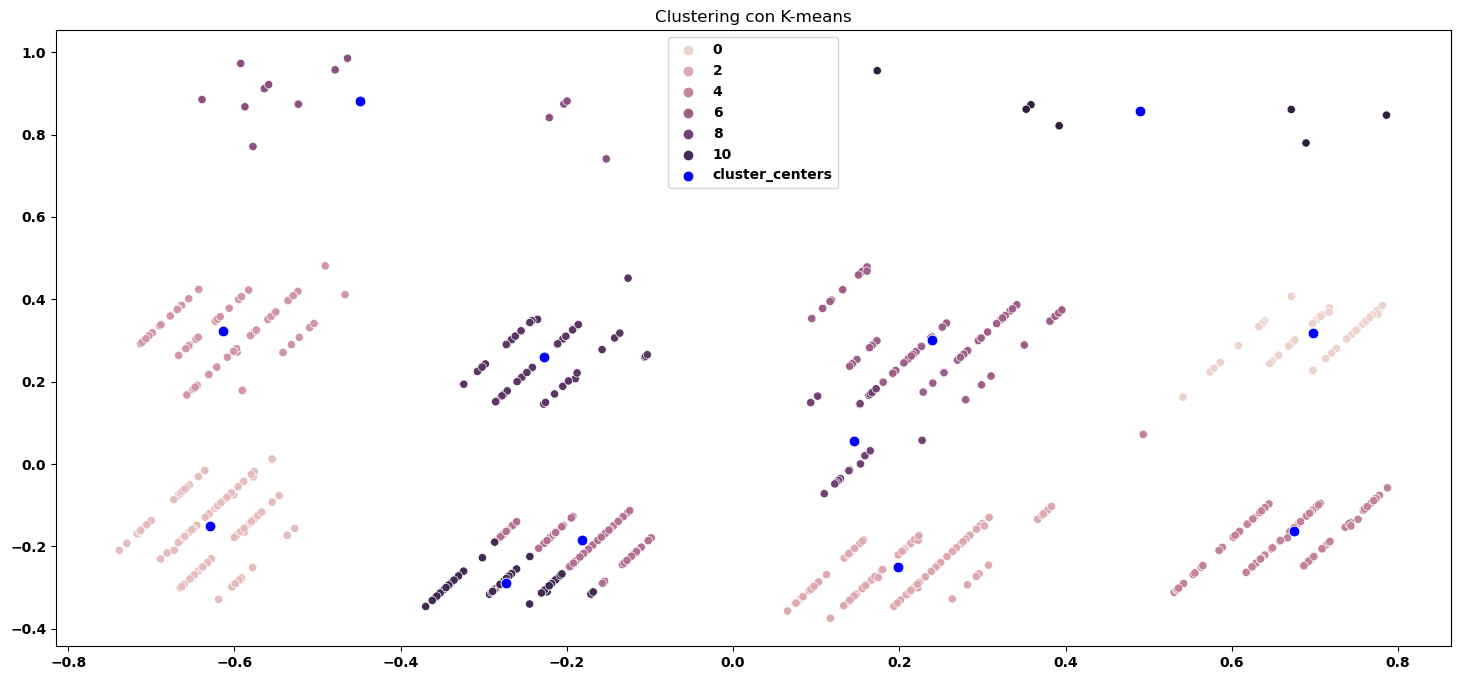

In [39]:
# Ejercicio 23.3.1:
modelo_km_23_3 = KMeans(n_clusters=12, random_state=100)

modelo_km_23_3.fit(pcv_23_1_2)

y_km_23_3 = modelo_km_23_3.labels_

centros_km_23_3 = modelo_km_23_3.cluster_centers_

print("SSE = ", modelo_km_23_3.inertia_)
print("Silhouette score = ", silhouette_score(pcv_23_1_2, y_km_23_3))

sns.scatterplot(x=pcv_23_1_2[:,0], y=pcv_23_1_2[:,1], hue=y_km_23_3)
sns.scatterplot(x=centros_km_23_3[:,0], y=centros_km_23_3[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con K-means")
plt.show()

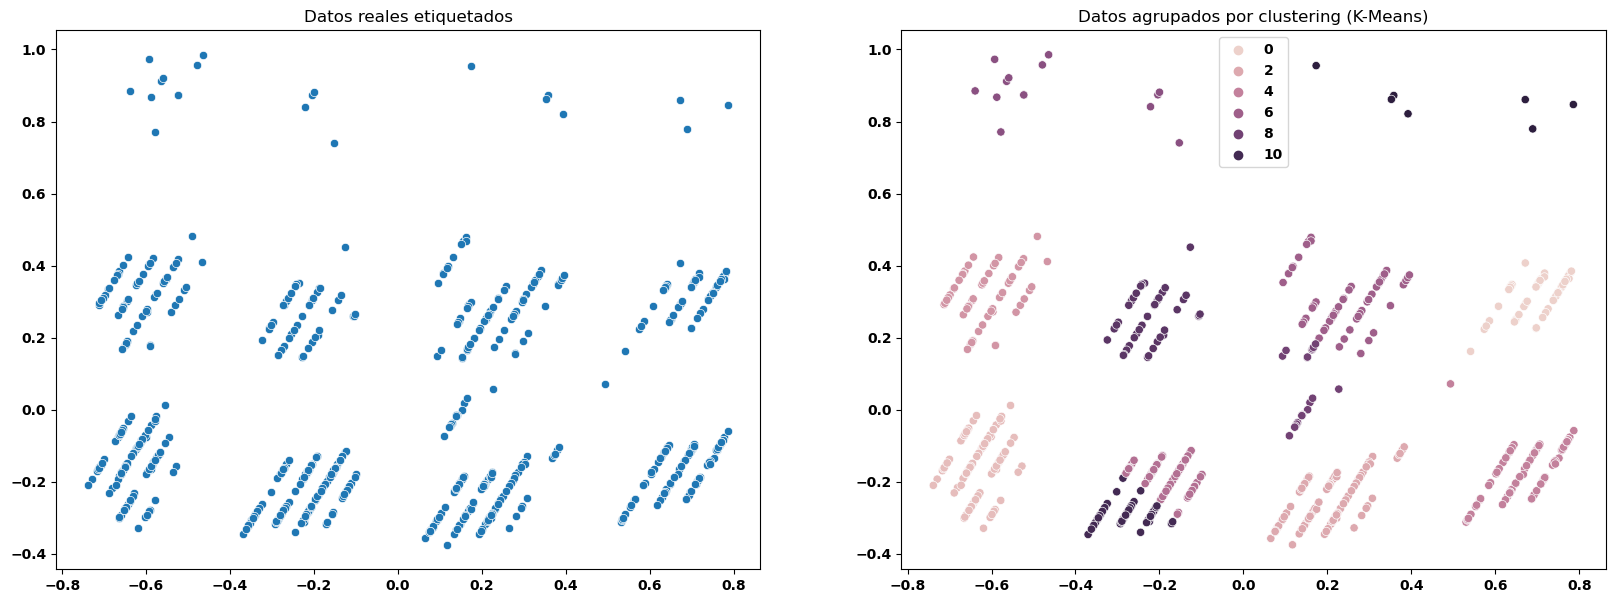

In [40]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=pcv_23_1_2[:,0], y=pcv_23_1_2[:,1], ax=axes[0])
axes[0].set_title("Datos reales etiquetados")

sns.scatterplot(x=pcv_23_1_2[:,0], y=pcv_23_1_2[:,1], hue=y_km_23_3, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (K-Means)")

plt.show()

SSE =  64.83166475227252
Silhouette score =  0.5791332907145977


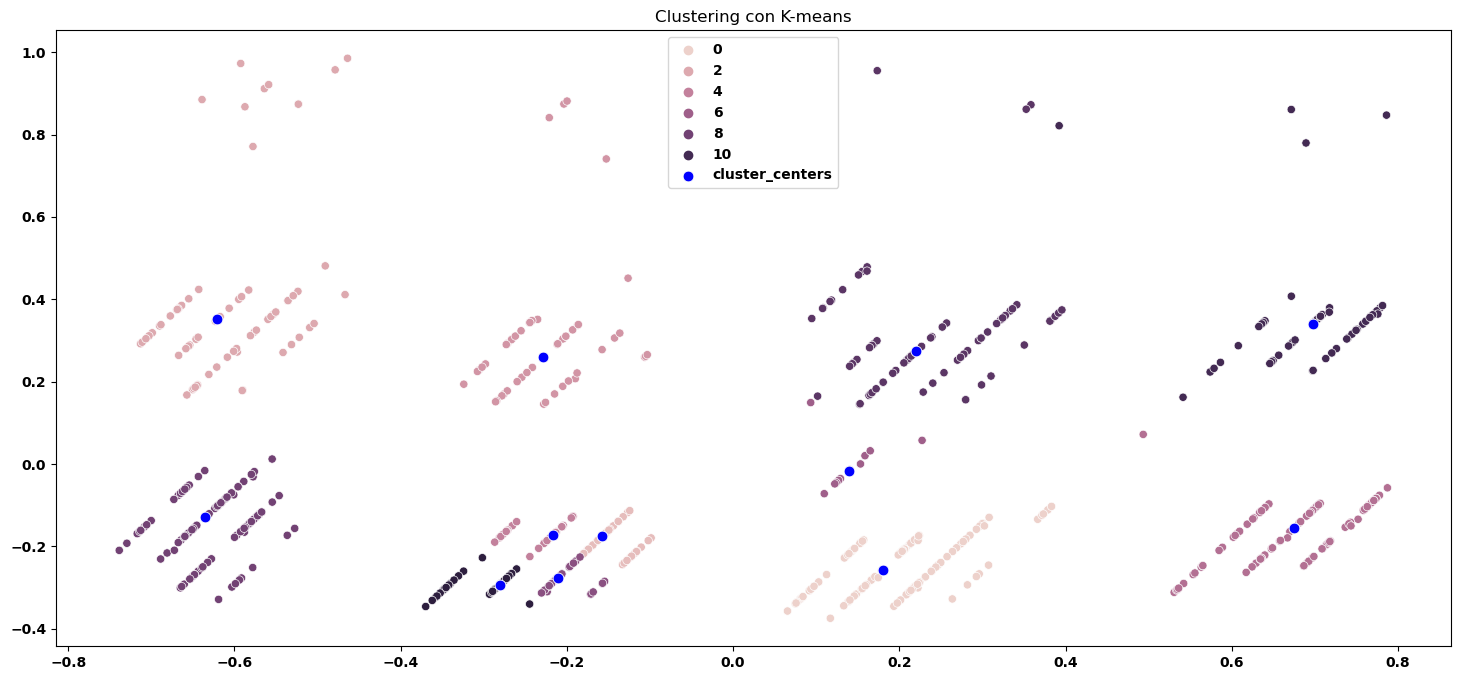

In [41]:
from sklearn_extra.cluster import KMedoids

modelo_kmed_23_3 = KMedoids(n_clusters=12, random_state=100)

modelo_kmed_23_3.fit(pcv_23_1_2)

y_kmed_23_3 = modelo_kmed_23_3.labels_

centros_kmed_23_3 = modelo_kmed_23_3.cluster_centers_

print("SSE = ", modelo_kmed_23_3.inertia_)
print("Silhouette score = ", silhouette_score(pcv_23_1_2, y_kmed_23_3))

sns.scatterplot(x=pcv_23_1_2[:,0], y=pcv_23_1_2[:,1], hue=y_kmed_23_3)
sns.scatterplot(x=centros_kmed_23_3[:,0], y=centros_kmed_23_3[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con K-means")
plt.show()

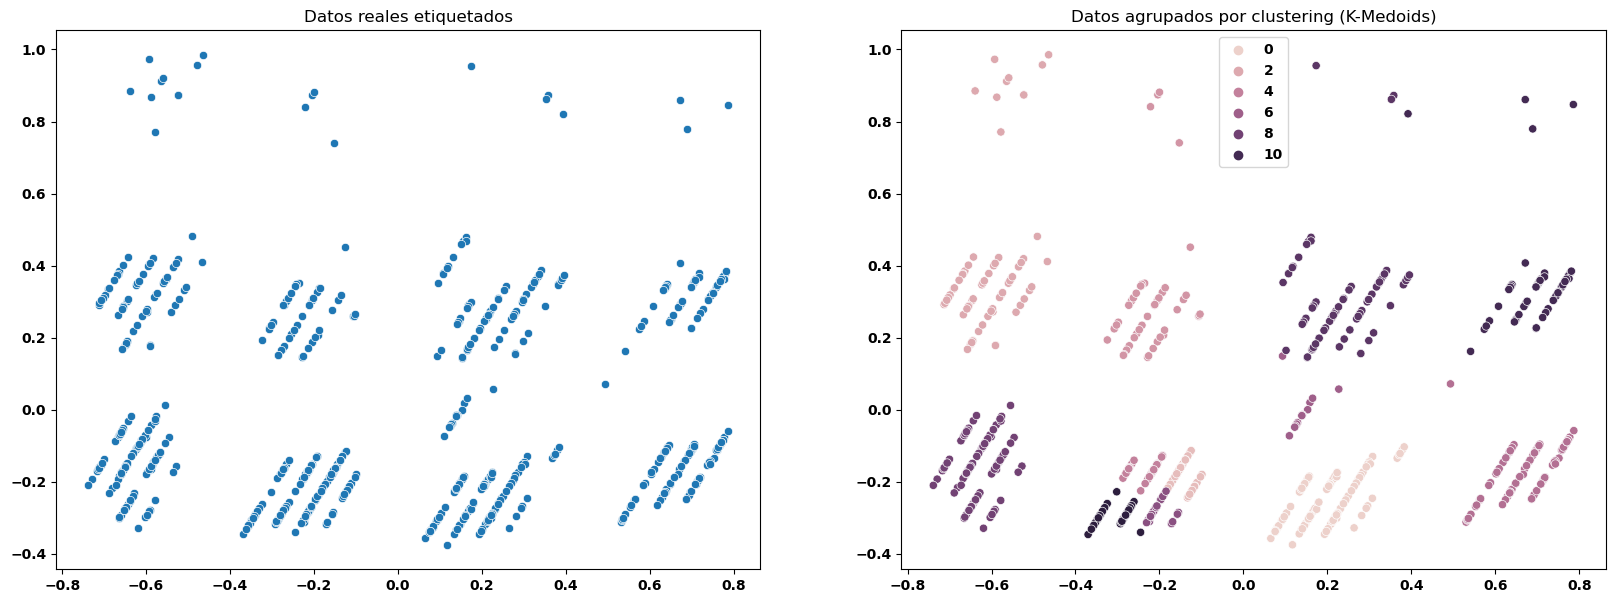

In [42]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=pcv_23_1_2[:,0], y=pcv_23_1_2[:,1], ax=axes[0])
axes[0].set_title("Datos reales etiquetados")

sns.scatterplot(x=pcv_23_1_2[:,0], y=pcv_23_1_2[:,1], hue=y_kmed_23_3, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (K-Medoids)")

plt.show()

Silhouette score =  0.6167067460649067


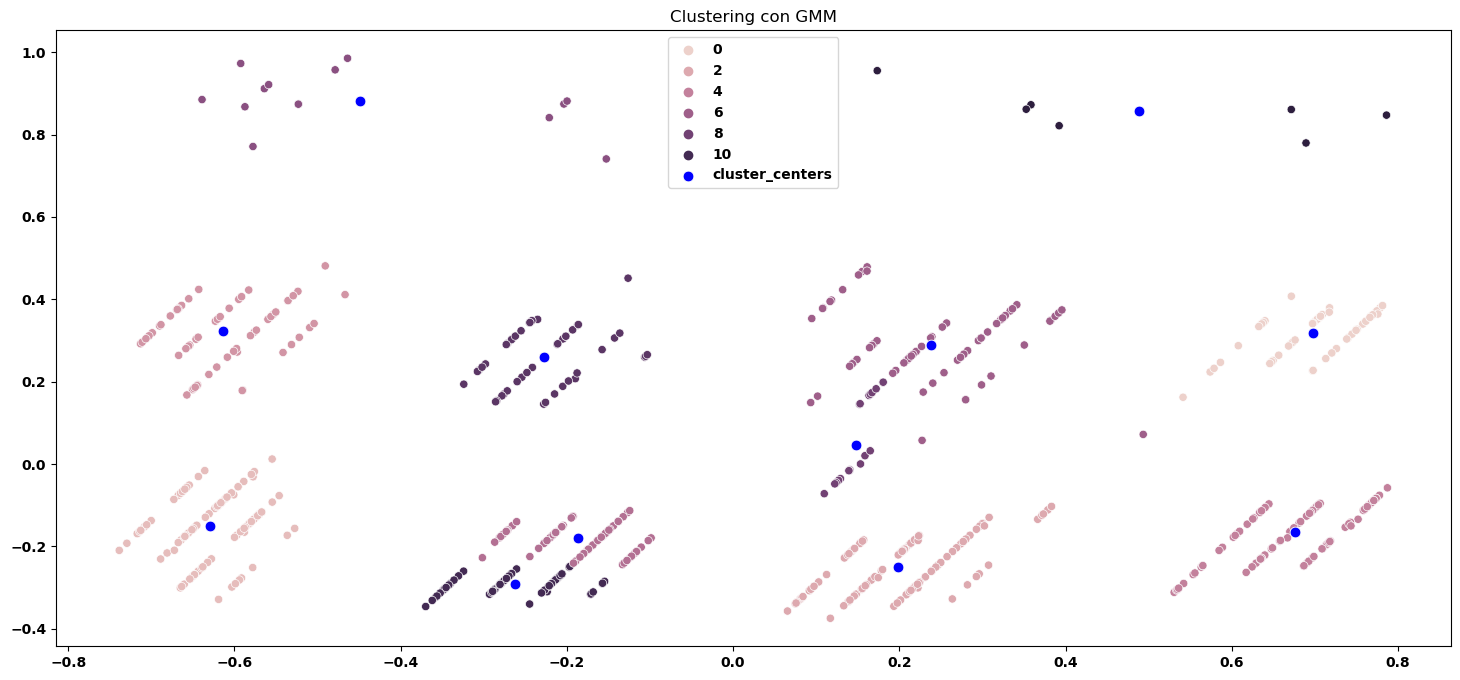

In [43]:
model_gmm_23_3 = GaussianMixture(n_components=12, random_state=100)

model_gmm_23_3.fit(pcv_23_1_2)

y_etiquetas_gmm_23_3 = model_gmm_23_3.predict(pcv_23_1_2)

centros_gmm_23_3 = model_gmm_23_3.means_

print("Silhouette score = ", silhouette_score(pcv_23_1_2, y_etiquetas_gmm_23_3))

sns.scatterplot(x=pcv_23_1_2[:,0], y=pcv_23_1_2[:,1], hue=y_etiquetas_gmm_23_3)
sns.scatterplot(x=centros_gmm_23_3[:,0], y=centros_gmm_23_3[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con GMM")
plt.show()

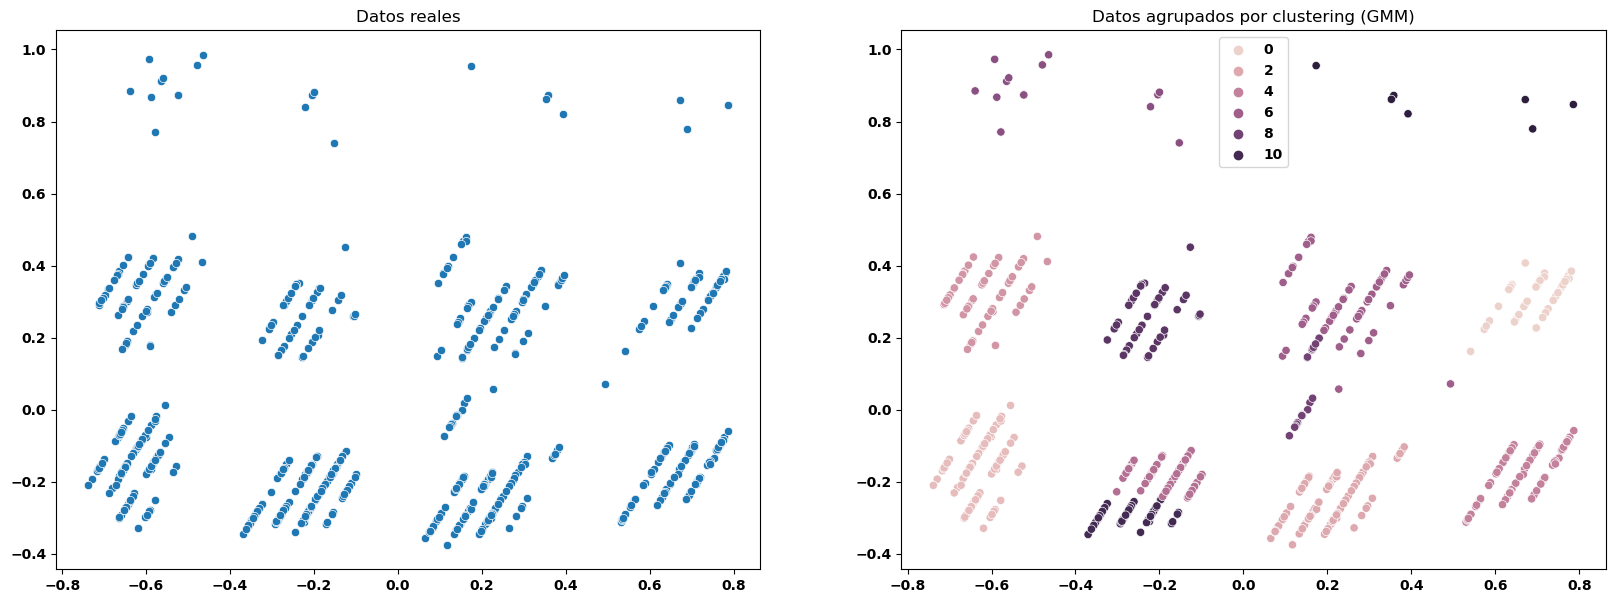

In [44]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=pcv_23_1_2[:,0], y=pcv_23_1_2[:,1], ax=axes[0])
axes[0].set_title("Datos reales")

sns.scatterplot(x=pcv_23_1_2[:,0], y=pcv_23_1_2[:,1], hue=y_etiquetas_gmm_23_3, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (GMM)")

plt.show()

Silhouette score =  0.6512559703086638


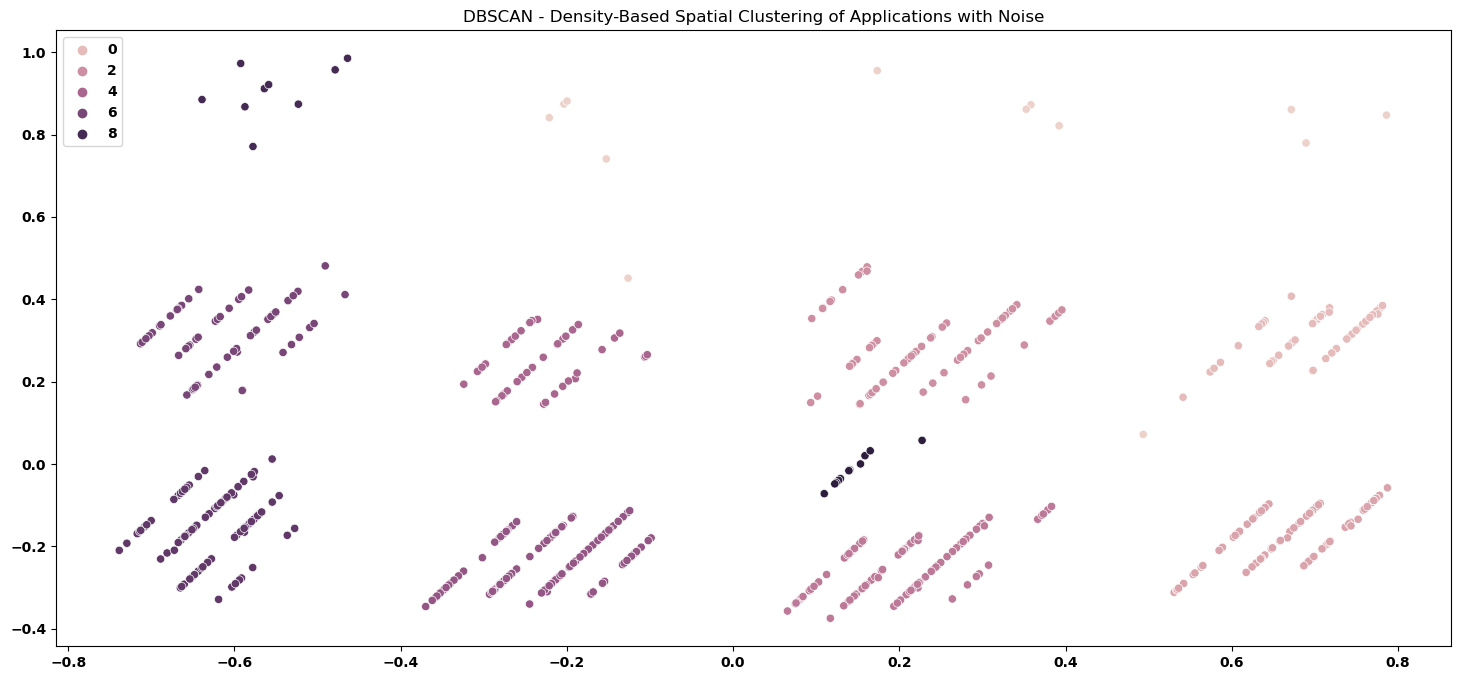

In [45]:
from sklearn.cluster import DBSCAN

modelo_dbscan_23_3 = DBSCAN(eps=0.10, n_jobs=-1)

modelo_dbscan_23_3.fit(pcv_23_1_2)

y_etiquetas_dbscan_23_3 = modelo_dbscan_23_3.labels_

print("Silhouette score = ", silhouette_score(pcv_23_1_2, y_etiquetas_dbscan_23_3))

sns.scatterplot(x=pcv_23_1_2[:,0], y=pcv_23_1_2[:,1], hue=y_etiquetas_dbscan_23_3)
plt.title("DBSCAN - Density-Based Spatial Clustering of Applications with Noise")
plt.show()

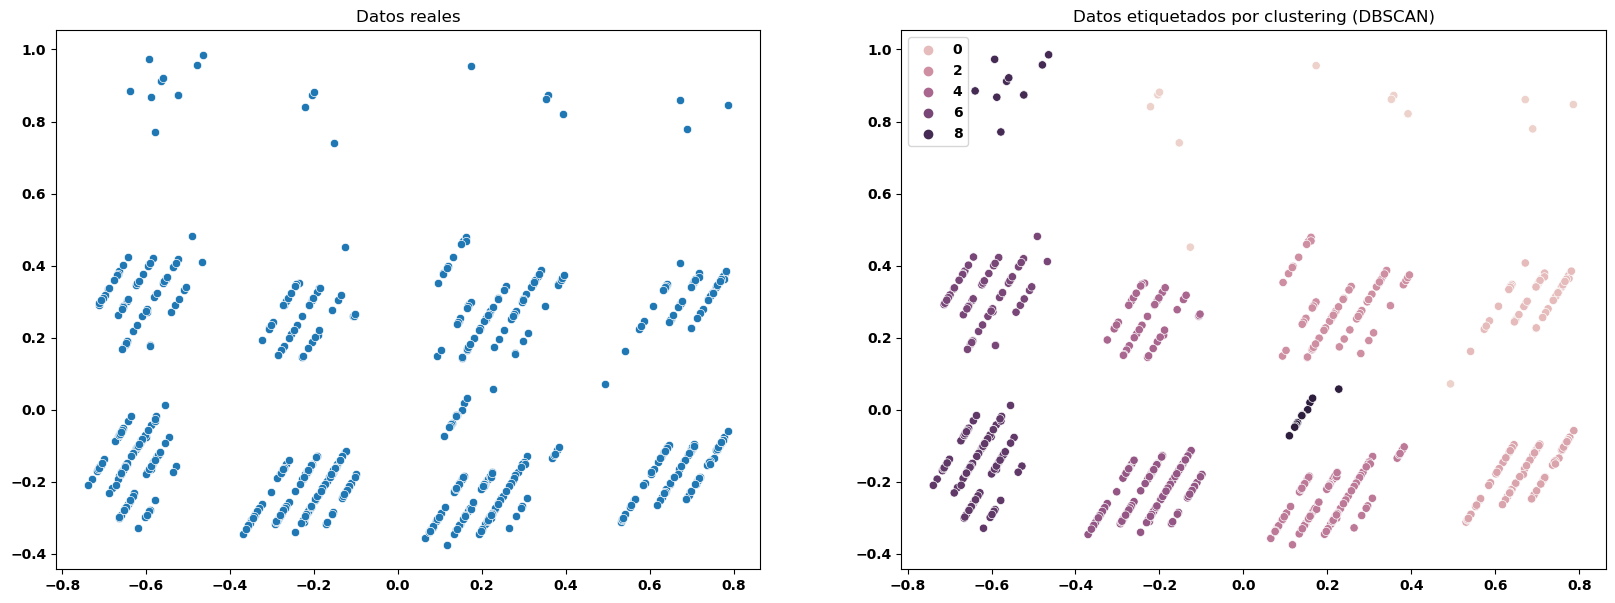

In [46]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=pcv_23_1_2[:,0], y=pcv_23_1_2[:,1], ax=axes[0])
axes[0].set_title("Datos reales")

sns.scatterplot(x=pcv_23_1_2[:,0], y=pcv_23_1_2[:,1], hue=y_etiquetas_dbscan_23_3, ax=axes[1])
axes[1].set_title("Datos etiquetados por clustering (DBSCAN)")

plt.show()

Silhouette score =  0.5771891601677546


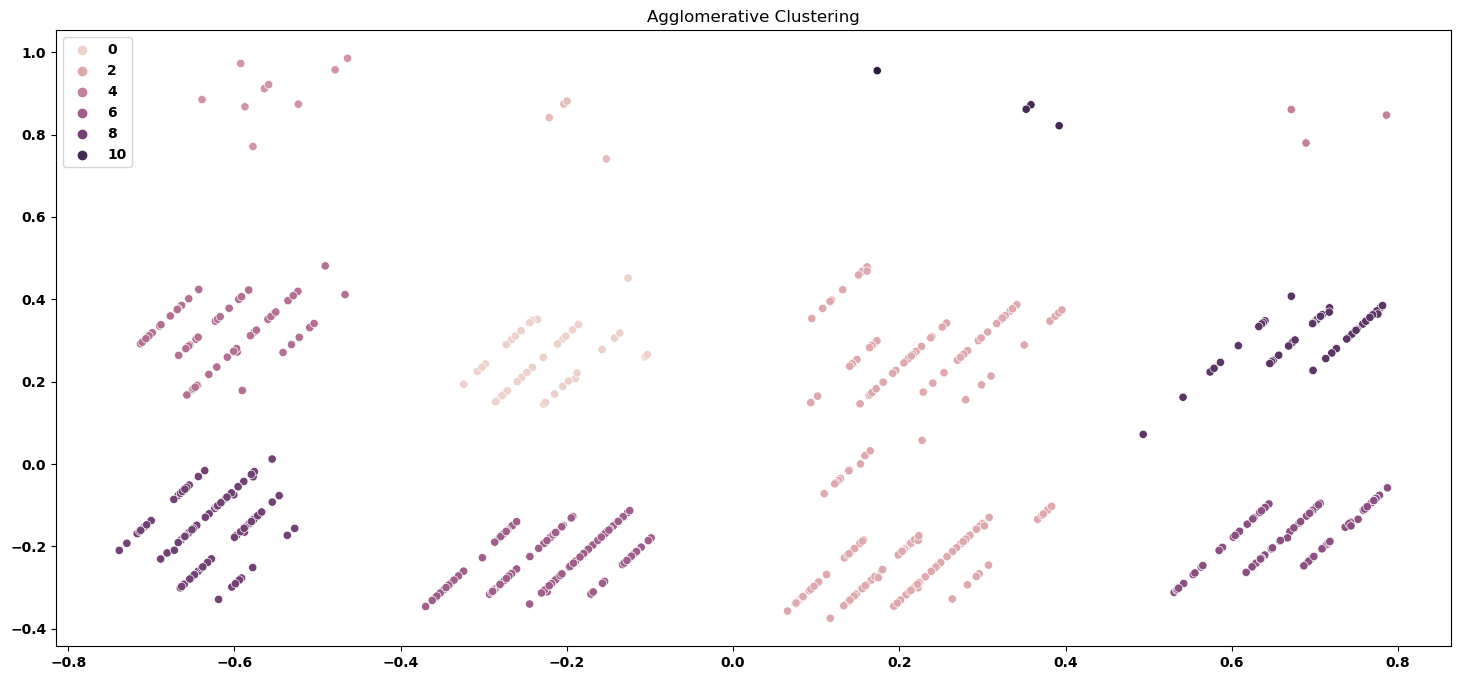

In [47]:
from sklearn.cluster import AgglomerativeClustering

modelo_agg_23_3 = AgglomerativeClustering(n_clusters=12, linkage='single', metric='euclidean')

modelo_agg_23_3.fit(pcv_23_1_2)

y_etiquetas_agg_23_3 = modelo_agg_23_3.labels_

print("Silhouette score = ", silhouette_score(pcv_23_1_2, y_etiquetas_agg_23_3))

sns.scatterplot(x=pcv_23_1_2[:,0], y=pcv_23_1_2[:,1], hue=y_etiquetas_agg_23_3)
plt.title("Agglomerative Clustering")
plt.show()

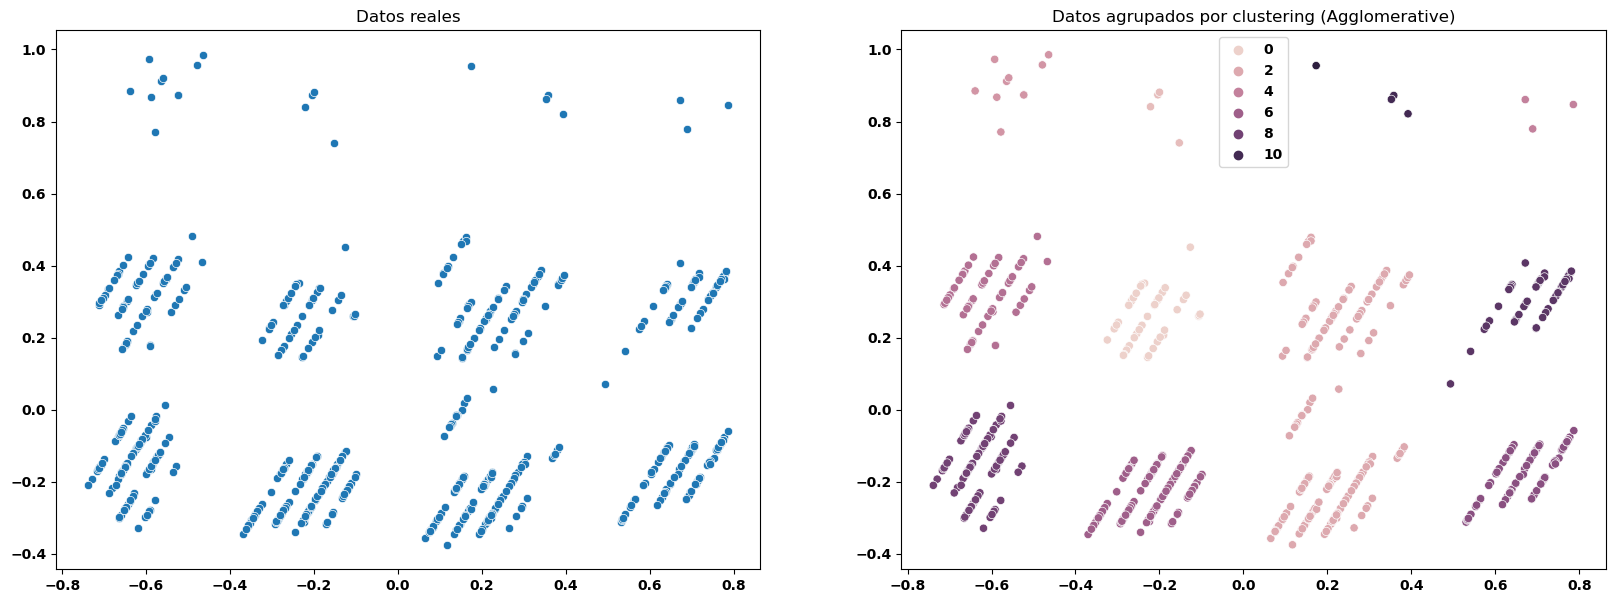

In [48]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=pcv_23_1_2[:,0], y=pcv_23_1_2[:,1], ax=axes[0])
axes[0].set_title("Datos reales")

sns.scatterplot(x=pcv_23_1_2[:,0], y=pcv_23_1_2[:,1], hue=y_etiquetas_agg_23_3, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (Agglomerative)")

plt.show()

#### Análisis 23.3.1:
El modelo que concuerdan más sus predicciones son las del modelo Agglomerative.

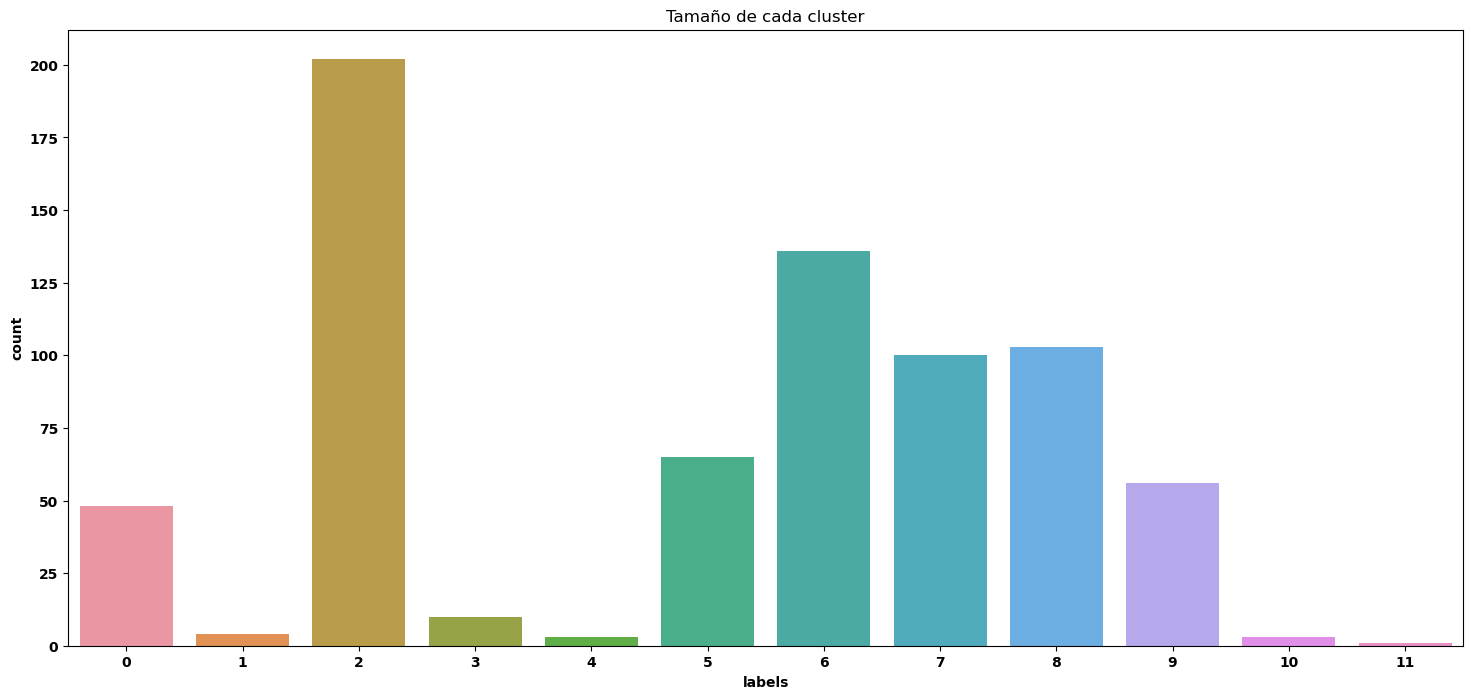

In [49]:
# Ejercicio 23.3.2:
df_bike3['labels'] = y_etiquetas_agg_23_3

sns.countplot(data=df_bike3, x='labels')
plt.title('Tamaño de cada cluster')
plt.show()

### **`Ejercicio 23.4`**

**`23.4.1`** Compara las cracterísticas del **primer cluster** con el **décimo grupo** (_cluster_0_ y _cluster_9_) y explica los aspectos que revelan cada uno de estos grupos sobre los **distintos patrones de movilidad y el uso de _bike-sharing_** en la ciudad. Te puedes basar en los siguientes criterios para describir y comparar el perfil que representa cada cluster:

- **El volúmen de los viajes diarios** o el uso registrado de _bike-sharing_ por día, mediante la siguiente gráfica:  

  - La distribución de la volumetría de viajes/bicicletas alquiladas al día (`'cnt'`) para esos dos clusters (por `'labels'` y usando _boxplot_).
- **El mes de año**, mediante la siguiente gráfica:
  - La distribución del mes de año (`'mnth'`) para esos dos clusters (por `'labels'` y usando _boxplot_).
- **Las condiciones del tiempo**, mediante la siguiente gráfica:
  - La distribución del estado del tiempo que hace en la ciudad (`'weathersit'`) para esos dos clusters (por `'labels'` y usando _boxplot_).

**`23.4.2`** Finalmente **sugiere posibles usos** que se pueda sacar de estos resultados y de este análisis!! 

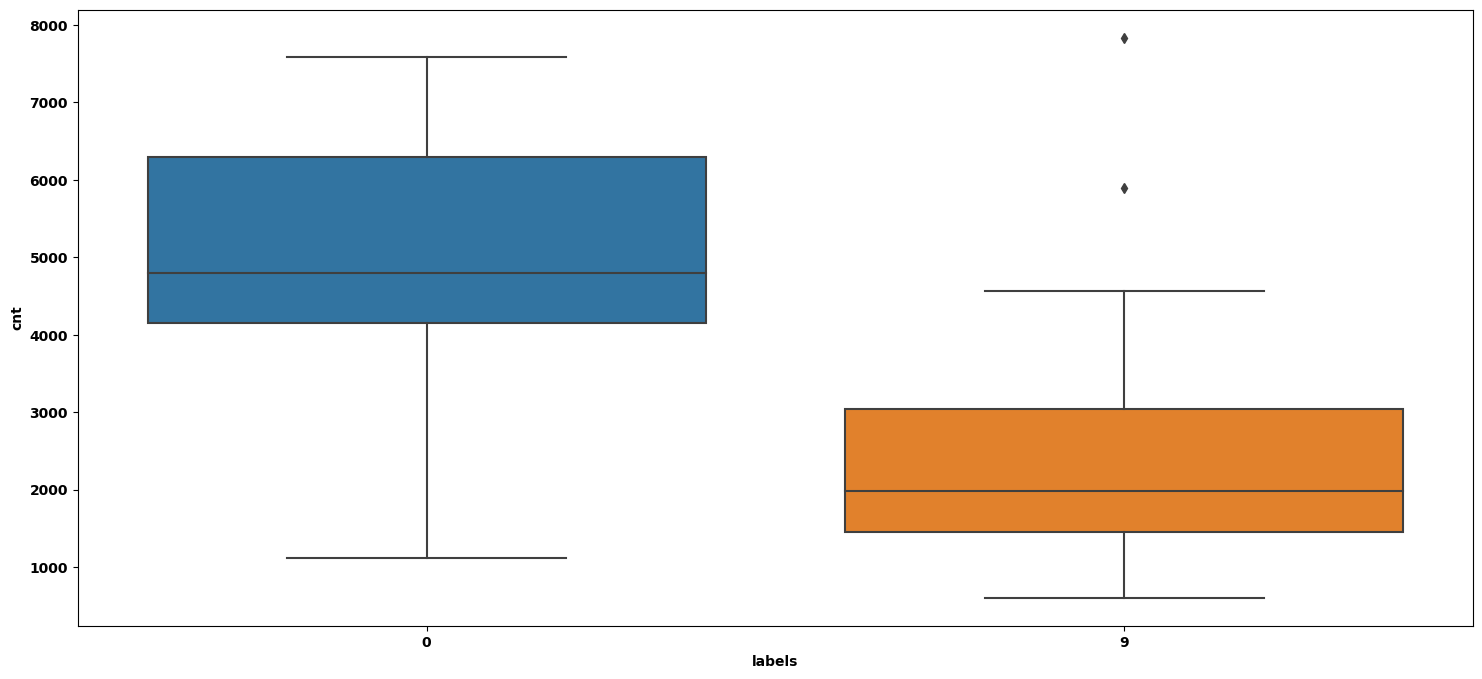

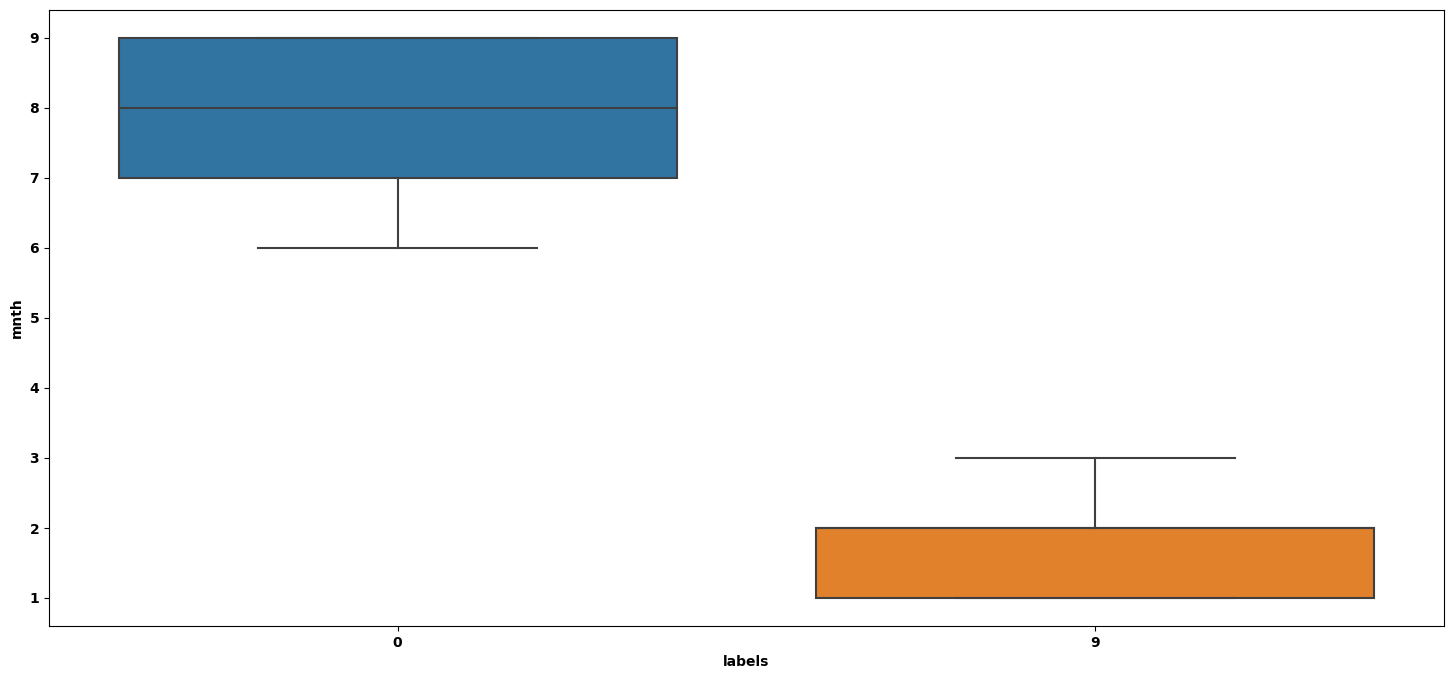

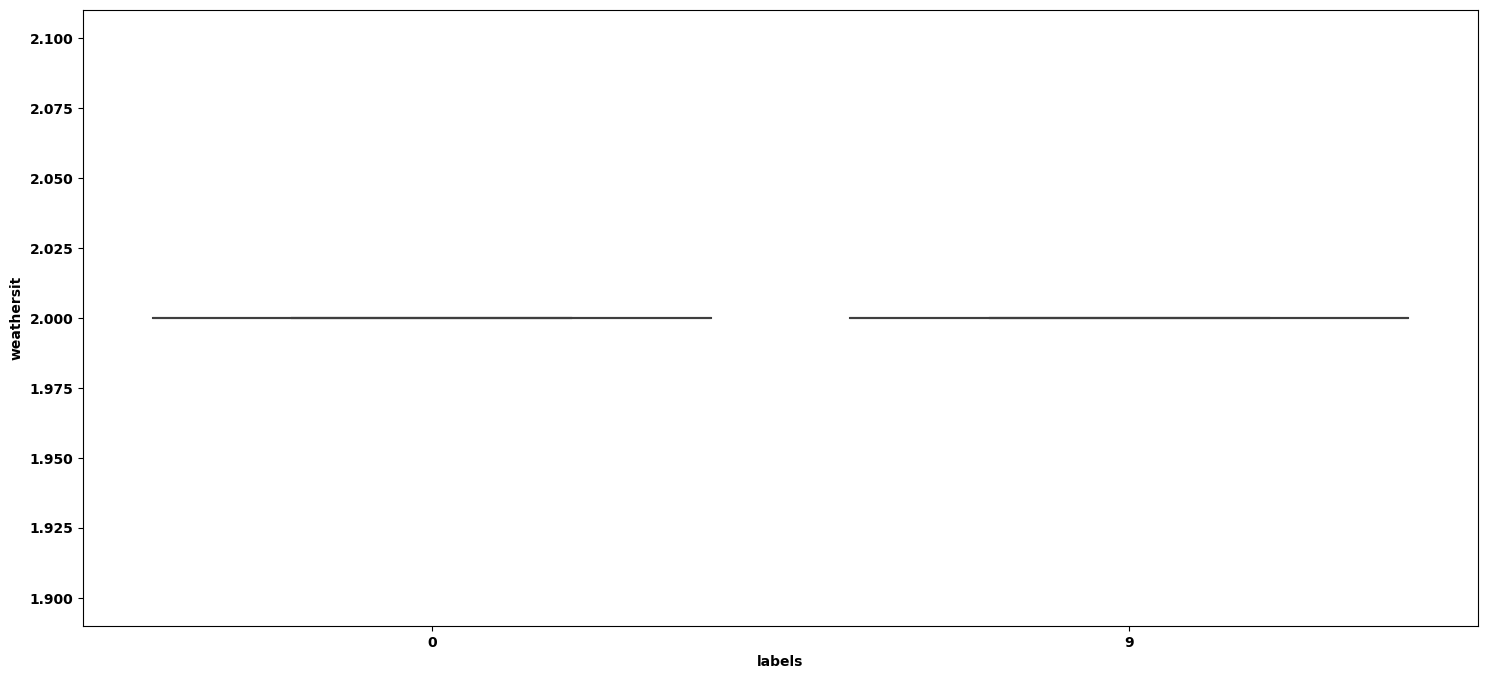

In [50]:
# Ejercicio 23.4.1:
df_clusters_23_4_1 = df_bike3[df_bike3['labels'].isin([0, 9])]

for variable in ['cnt', 'mnth', 'weathersit']:
    sns.boxplot(data=df_clusters_23_4_1, x='labels', y=variable)
    plt.show()

#### Análisis 23.4.1:
Mediante el análisis de los diagramas podemos saber diferentes cosas:

- El grupo que más alquila bicicletas es el 0.
- El grupo 0 alquila mayor número de bicicletas a final de año, y el grupo 9 a principios.


# Ejercicio 23.4.2:

Gracias al análisis podemos tener una mayor concienciación de los perfiles de usuarios que alquilan bicicletas. 

De esta forma podemos fomentar el uso del servicio durante todo el año haciendo ofertas o descuentos en meses donde sabemos que la demanda es inferior.

---